In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-analytics-ue-22-cs-342-aa-2-hackathon-2/sample_submission.csv
/kaggle/input/data-analytics-ue-22-cs-342-aa-2-hackathon-2/train.csv
/kaggle/input/data-analytics-ue-22-cs-342-aa-2-hackathon-2/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/data-analytics-ue-22-cs-342-aa-2-hackathon-2/train.csv")
test = pd.read_csv("/kaggle/input/data-analytics-ue-22-cs-342-aa-2-hackathon-2/test.csv")

In [3]:
# One-hot encode the 'weather' column
train = pd.get_dummies(train, columns=['weather'], prefix='weather',dtype=int)
test = pd.get_dummies(test, columns=['weather'], prefix='weather',dtype=int)

# Display the updated dataset
print(train.head())

             timestamp  average_fare  rides_completed  driver_availability  \
0  2021-01-01 00:00:00     20.780423              457            49.170948   
1  2021-01-01 00:00:00     90.000000               80            30.000000   
2  2021-01-01 00:00:00     41.197085              239            39.110219   
3  2021-01-01 01:00:00     20.772227              141            30.000000   
4  2021-01-01 01:00:00     90.969805               98            30.000000   

   surge_multiplier vehicle_type  traffic_index  special_event  weather_Clear  \
0               1.0         bike             63              0              1   
1               1.0          car             53              0              1   
2               1.0         auto             35              0              1   
3               1.5         bike             83              0              0   
4               1.0          car             26              0              1   

   weather_Cloudy  weather_Rainy  weather_St

In [4]:
train.head()

,timestamp,average_fare,rides_completed,driver_availability,surge_multiplier,vehicle_type,traffic_index,special_event,weather_Clear,weather_Cloudy,weather_Rainy,weather_Stormy
0,2021-01-01 00:00:00,20.780423,457,49.170948,1.0,bike,63,0,1,0,0,0
1,2021-01-01 00:00:00,90.000000,80,30.000000,1.0,car,53,0,1,0,0,0
2,2021-01-01 00:00:00,41.197085,239,39.110219,1.0,auto,35,0,1,0,0,0
3,2021-01-01 01:00:00,20.772227,141,30.000000,1.5,bike,83,0,0,0,0,1
4,2021-01-01 01:00:00,90.969805,98,30.000000,1.0,car,26,0,1,0,0,0


In [5]:
import warnings
warnings.filterwarnings("ignore")

### Task 1: Data Exploration and Preparation (1 mark)

- Conduct exploratory data analysis to identify trends, patterns, and anomalies in fare data for each vehicle type (bikes, autos, and cars) in Quahog City.
- Using appropriate visualizations and techniques, provide an in-depth analysis on the nature of the average fare and other features in the dataset.

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [7]:
# Your code along with reasoning
train.info()    
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63015 entries, 0 to 63014
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            63015 non-null  object 
 1   average_fare         63015 non-null  float64
 2   rides_completed      63015 non-null  int64  
 3   driver_availability  63015 non-null  float64
 4   surge_multiplier     63015 non-null  float64
 5   vehicle_type         63015 non-null  object 
 6   traffic_index        63015 non-null  int64  
 7   special_event        63015 non-null  int64  
 8   weather_Clear        63015 non-null  int64  
 9   weather_Cloudy       63015 non-null  int64  
 10  weather_Rainy        63015 non-null  int64  
 11  weather_Stormy       63015 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 5.8+ MB


,average_fare,rides_completed,driver_availability,surge_multiplier,traffic_index,special_event,weather_Clear,weather_Cloudy,weather_Rainy,weather_Stormy
count,63015.000000,63015.000000,63015.000000,63015.000000,63015.000000,63015.000000,63015.000000,63015.000000,63015.000000,63015.000000
mean,70.186256,376.739760,44.695420,1.253939,59.514909,0.100294,0.601047,0.199905,0.150520,0.048528
std,39.465587,302.994799,15.321958,0.259068,23.152674,0.300393,0.489687,0.399932,0.357583,0.214881
min,20.000000,10.000000,30.000000,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,146.000000,30.000000,1.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.554098,287.000000,40.476311,1.215105,59.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,106.082575,550.000000,54.190376,1.400000,80.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,161.963018,2614.000000,100.000000,3.400358,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
train.shape

(63015, 12)

We are checking the number of missing values in each column



In [9]:
train.isnull().sum()

timestamp              0
average_fare           0
rides_completed        0
driver_availability    0
surge_multiplier       0
vehicle_type           0
traffic_index          0
special_event          0
weather_Clear          0
weather_Cloudy         0
weather_Rainy          0
weather_Stormy         0
dtype: int64

In [10]:
train.columns

Index(['timestamp', 'average_fare', 'rides_completed', 'driver_availability',
       'surge_multiplier', 'vehicle_type', 'traffic_index', 'special_event',
       'weather_Clear', 'weather_Cloudy', 'weather_Rainy', 'weather_Stormy'],
      dtype='object')

In [11]:
for i in train.columns:
    print(i+'\n',train[i].unique())

timestamp
 ['2021-01-01 00:00:00' '2021-01-01 01:00:00' '2021-01-01 02:00:00' ...
 '2023-05-26 02:00:00' '2023-05-26 03:00:00' '2023-05-26 04:00:00']
average_fare
 [ 20.78042327  90.          41.19708456 ... 158.416337    82.34085401
  41.57365066]
rides_completed
 [ 457   80  239 ... 1560 1569 1404]
driver_availability
 [49.17094813 30.         39.1102192  ... 41.17188031 48.69139881
 38.9213444 ]
surge_multiplier
 [1.         1.5        1.3        ... 1.64253251 1.05715651 1.19027335]
vehicle_type
 ['bike' 'car' 'auto']
traffic_index
 [63 53 35 83 26 80 21 48 29 54 76 55 97 88 46 34 81 45 30 89 38 91 52 47
 84 86 27 78 20 71 93 49 33 51 94 22 37 58 41 90 57 69 77 75 36 82 61 40
 67 85 44 68 70 32 23 79 59 98 65 50 42 92 56 64 39 28 66 87 96 24 31 25
 73 74 62 95 99 43 60 72]
special_event
 [0 1]
weather_Clear
 [1 0]
weather_Cloudy
 [0 1]
weather_Rainy
 [0 1]
weather_Stormy
 [0 1]


We are getting all the unique values in every column so that we can find the range of values

timestamp: it shows data is of 2 year

s average fare: column has continous value

s rides completed : interger colum

n driver availability : continous value

s surge multiplier : continous value

s vehicle type : categorical with bike, car, and aut

o traffic index : values from 20-9

9 special event : binary column weather: convertedd to bonary col* umn

In [12]:
train['timestamp'] = pd.to_datetime(train['timestamp'])
train = train.sort_values(by='timestamp')
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63015 entries, 0 to 63014
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            63015 non-null  datetime64[ns]
 1   average_fare         63015 non-null  float64       
 2   rides_completed      63015 non-null  int64         
 3   driver_availability  63015 non-null  float64       
 4   surge_multiplier     63015 non-null  float64       
 5   vehicle_type         63015 non-null  object        
 6   traffic_index        63015 non-null  int64         
 7   special_event        63015 non-null  int64         
 8   weather_Clear        63015 non-null  int64         
 9   weather_Cloudy       63015 non-null  int64         
 10  weather_Rainy        63015 non-null  int64         
 11  weather_Stormy       63015 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(7), object(1)
memory usage: 6.2+ MB


In [13]:
test['timestamp'] = pd.to_datetime(test['timestamp'])
test = test.sort_values(by='timestamp')
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15756 entries, 0 to 15755
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            15756 non-null  datetime64[ns]
 1   rides_completed      15756 non-null  int64         
 2   driver_availability  15756 non-null  float64       
 3   surge_multiplier     15756 non-null  float64       
 4   vehicle_type         15756 non-null  object        
 5   traffic_index        15756 non-null  int64         
 6   special_event        15756 non-null  int64         
 7   weather_Clear        15756 non-null  int64         
 8   weather_Cloudy       15756 non-null  int64         
 9   weather_Rainy        15756 non-null  int64         
 10  weather_Stormy       15756 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(7), object(1)
memory usage: 1.4+ MB


converting the timestamp to datetime and sorting the values based on time as timestamp is now date and time we can do time series operations

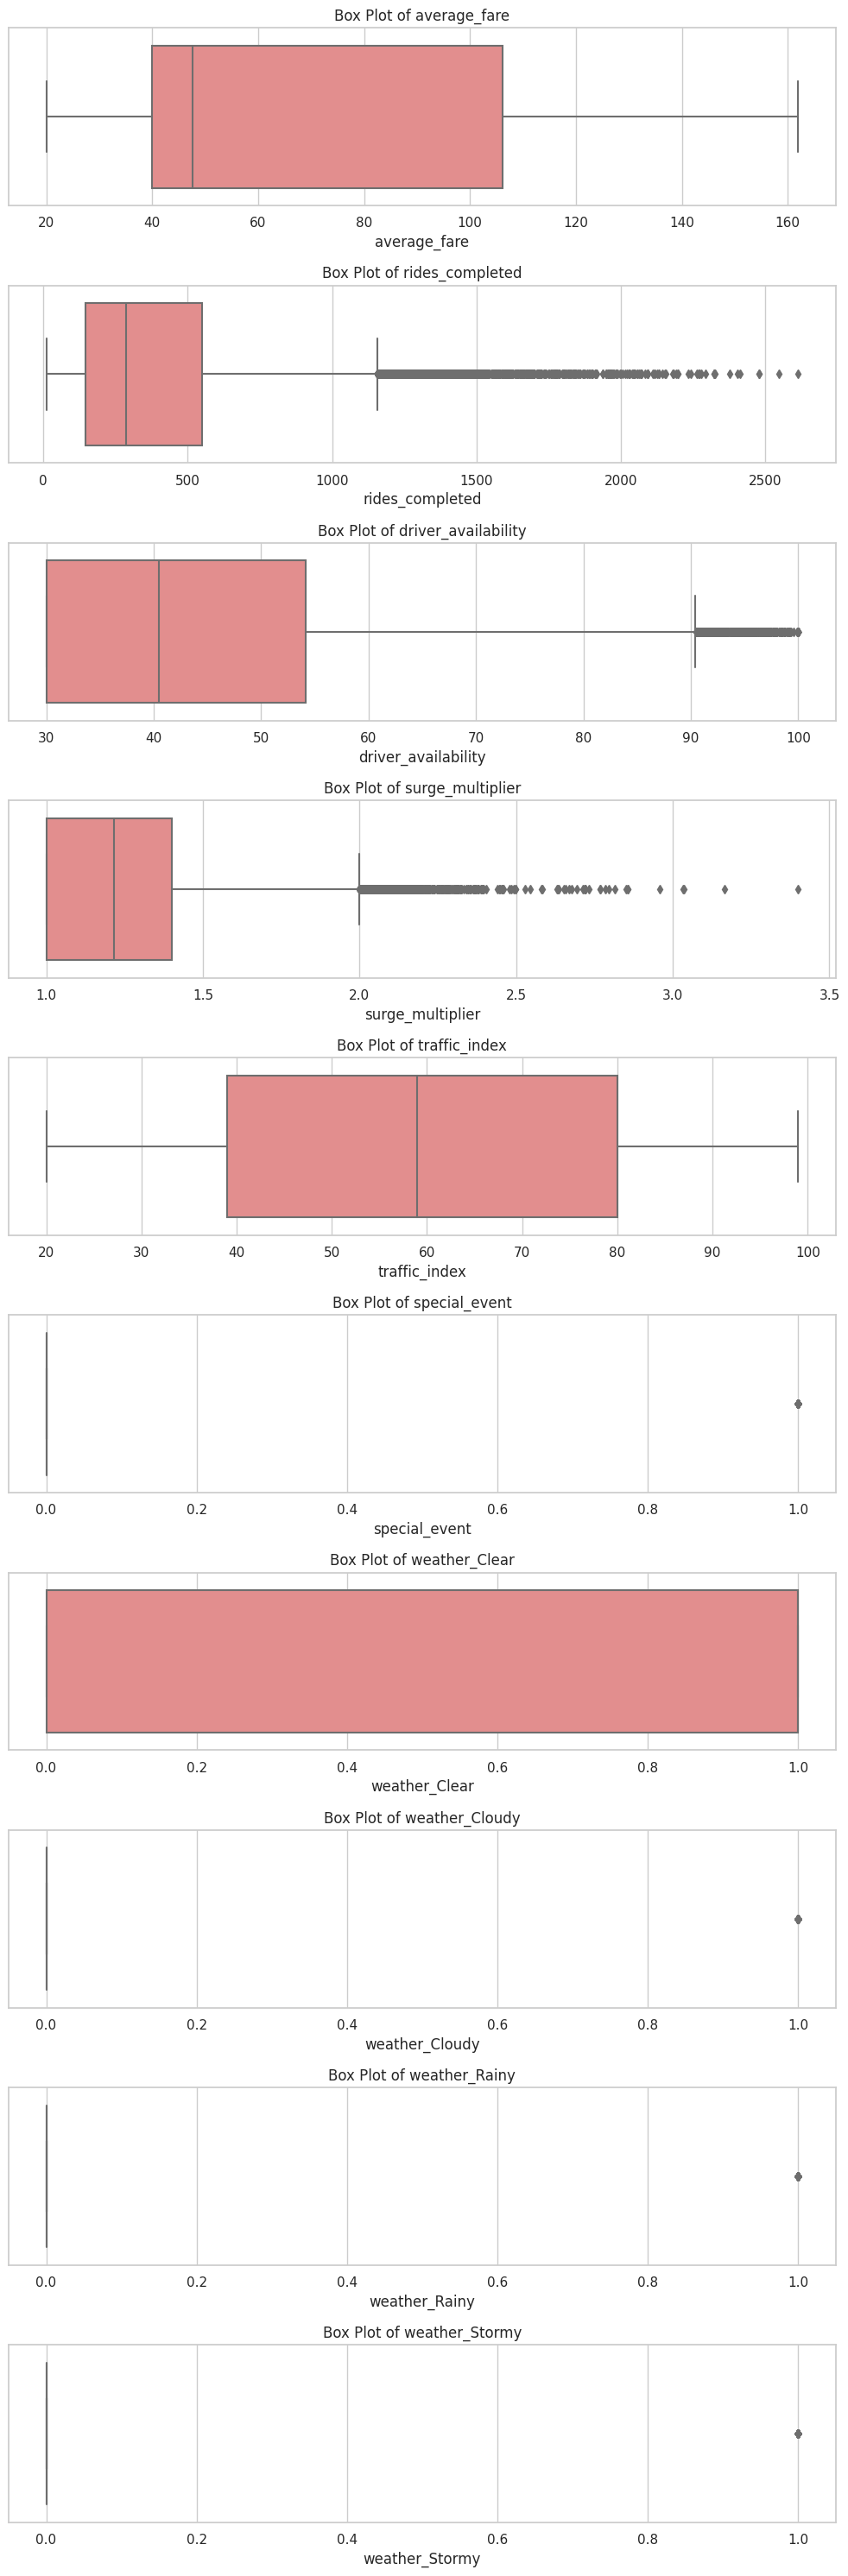

In [14]:
sns.set(style="whitegrid")

numeric_columns = train.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(10, len(numeric_columns)*3))

for i, col in enumerate(numeric_columns):
    sns.boxplot(data=train, x=col, ax=axes[i], color='lightcoral')
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

we are using boxplots to find outliers and spread in numberic columns

There are a lot of outliers in surge_multiplier, driver_availability , rides_completed

the spread on weather shows us that values range between 0 and 1

In [15]:
train.head()

,timestamp,average_fare,rides_completed,driver_availability,surge_multiplier,vehicle_type,traffic_index,special_event,weather_Clear,weather_Cloudy,weather_Rainy,weather_Stormy
0,2021-01-01 00:00:00,20.780423,457,49.170948,1.0,bike,63,0,1,0,0,0
1,2021-01-01 00:00:00,90.000000,80,30.000000,1.0,car,53,0,1,0,0,0
2,2021-01-01 00:00:00,41.197085,239,39.110219,1.0,auto,35,0,1,0,0,0
3,2021-01-01 01:00:00,20.772227,141,30.000000,1.5,bike,83,0,0,0,0,1
4,2021-01-01 01:00:00,90.969805,98,30.000000,1.0,car,26,0,1,0,0,0


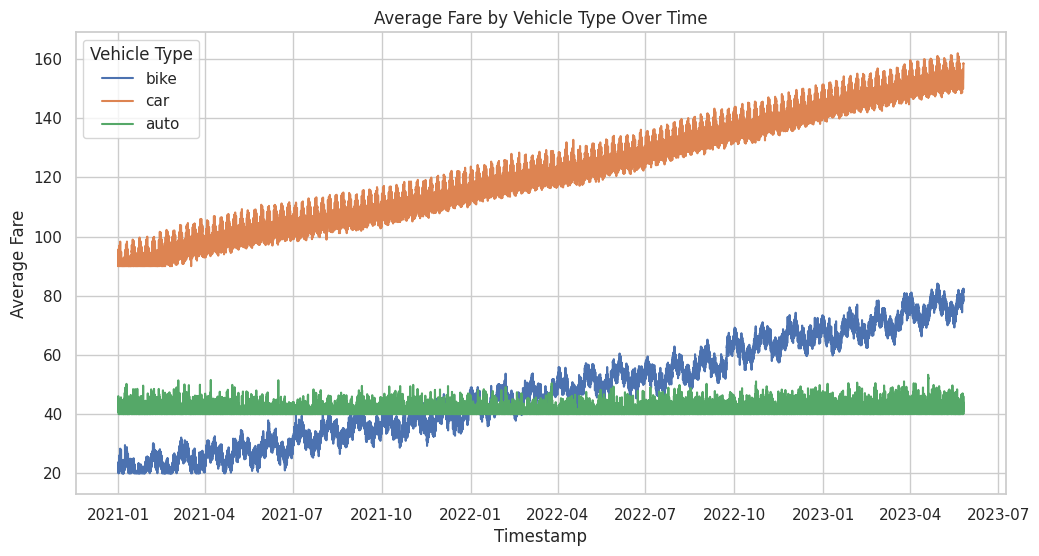

In [16]:
plt.figure(figsize=(12, 6))

for vehicle_type in train['vehicle_type'].unique():
    subset = train[train['vehicle_type'] == vehicle_type]
    plt.plot(subset['timestamp'], subset['average_fare'], label=vehicle_type)

plt.title("Average Fare by Vehicle Type Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Average Fare")
plt.legend(title="Vehicle Type")
plt.show()


Average fare of car is increasing linearly with time Average fare of bike is increasing linearly with time Average fare of auto is constant over time

In [17]:
train.head()

,timestamp,average_fare,rides_completed,driver_availability,surge_multiplier,vehicle_type,traffic_index,special_event,weather_Clear,weather_Cloudy,weather_Rainy,weather_Stormy
0,2021-01-01 00:00:00,20.780423,457,49.170948,1.0,bike,63,0,1,0,0,0
1,2021-01-01 00:00:00,90.000000,80,30.000000,1.0,car,53,0,1,0,0,0
2,2021-01-01 00:00:00,41.197085,239,39.110219,1.0,auto,35,0,1,0,0,0
3,2021-01-01 01:00:00,20.772227,141,30.000000,1.5,bike,83,0,0,0,0,1
4,2021-01-01 01:00:00,90.969805,98,30.000000,1.0,car,26,0,1,0,0,0


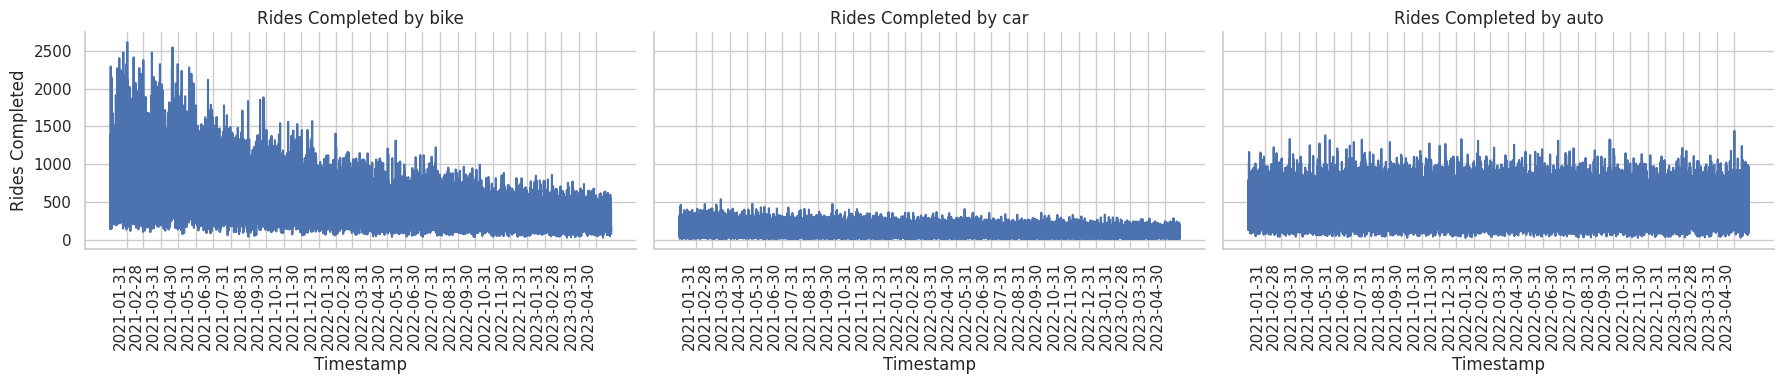

In [18]:
g = sns.FacetGrid(train, col="vehicle_type", height=4, aspect=1.5)
g.map(sns.lineplot, "timestamp", "rides_completed")

for ax in g.axes.flat:
    ax.set_xticks(pd.date_range(start=train['timestamp'].min(), end=train['timestamp'].max(), freq='M'))  # Monthly ticks
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')  # Rotate labels

g.set_axis_labels("Timestamp", "Rides Completed")
g.set_titles("Rides Completed by {col_name}")
plt.tight_layout()
plt.show()


We are checking for seasonality and fluctuations in demand

with the plots we can see that

For bikes high number of rides completed over time. Bike is the most popular vehicle type in this platform

The trends are stable so there is no seasonality in the data

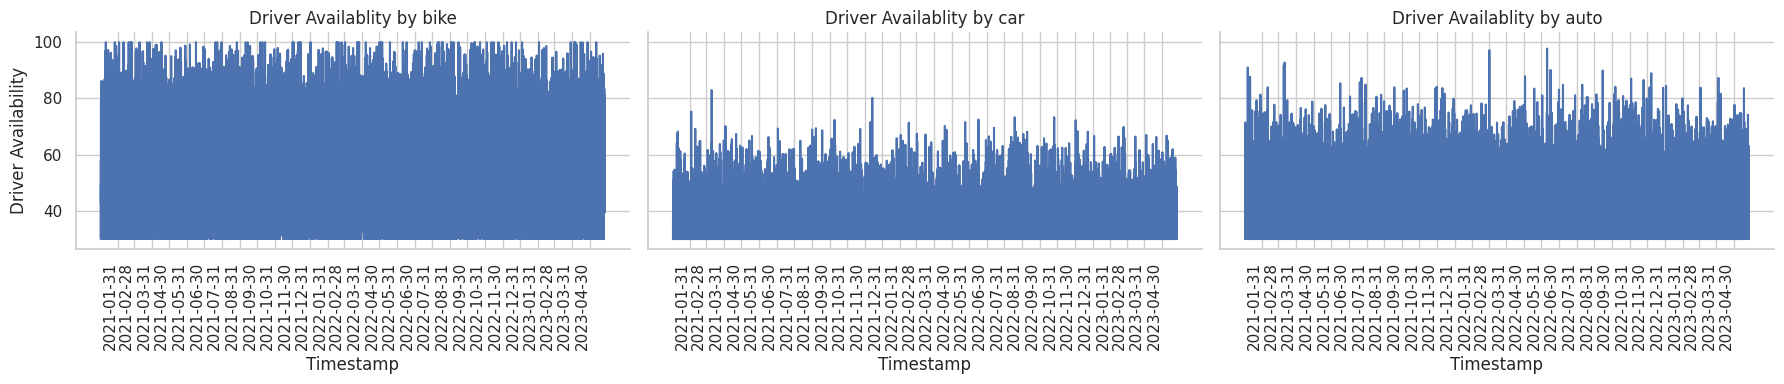

In [19]:
g = sns.FacetGrid(train, col="vehicle_type", height=4, aspect=1.5)
g.map(sns.lineplot, "timestamp", "driver_availability")

for ax in g.axes.flat:
    ax.set_xticks(pd.date_range(start=train['timestamp'].min(), end=train['timestamp'].max(), freq='M'))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')  

g.set_axis_labels("Timestamp", "Driver Availability")
g.set_titles("Driver Availablity by {col_name}")
plt.tight_layout()
plt.show()


Driver availability seems to be relatively consistent over time for all three vehicle types

Bike drivers appear to be the most readily available throughout the period

Car and auto driver availability appears to be slightly lower than bikes

In [20]:
import statsmodels.api as sm
for i in ['average_fare','rides_completed','driver_availability','traffic_index']:
    print(i)
    t = sm.tsa.adfuller(train[i], autolag='AIC')
    print(pd.Series(t[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used']))
    if t[1] < 0.05:
        print(f"{i} is likely stationary (reject null hypothesis).")
    else:
        print(f"{i} is likely non-stationary (fail to reject null hypothesis).")
    print("\n\n\n")

average_fare
Test Statistic                    -2.827382
p-value                            0.054468
#Lags Used                        61.000000
Number of Observations Used    62953.000000
dtype: float64
average_fare is likely non-stationary (fail to reject null hypothesis).




rides_completed
Test Statistic                -1.753586e+01
p-value                        4.213668e-30
#Lags Used                     6.100000e+01
Number of Observations Used    6.295300e+04
dtype: float64
rides_completed is likely stationary (reject null hypothesis).




driver_availability
Test Statistic                   -40.106483
p-value                            0.000000
#Lags Used                        60.000000
Number of Observations Used    62954.000000
dtype: float64
driver_availability is likely stationary (reject null hypothesis).




traffic_index
Test Statistic                  -145.808762
p-value                            0.000000
#Lags Used                         2.000000
Number of Observat

We are checking the stationarity of the given time series data

rides_completed driver_availability traffic_index -> time series is stationary

average_fare: time series exhibits a trend or seasonalitty so its non stationary

In [21]:
# Apply log transformation to 'average_fare' column
train['log_average_fare'] = np.log(train['average_fare'])

# Check the transformed data
print(train[['average_fare', 'log_average_fare']].head())


   average_fare  log_average_fare
0     20.780423          3.034011
1     90.000000          4.499810
2     41.197085          3.718367
3     20.772227          3.033617
4     90.969805          4.510528


Since its non stationary in the average fare data we need to apply log transform to normalize it

In [22]:
import statsmodels.api as sm
t = sm.tsa.adfuller(train['log_average_fare'], autolag='AIC')
result = pd.Series(t[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
print(result)
if t[1] < 0.05:
    print("The log-transformed 'average_fare' is likely stationary (reject null hypothesis).")
else:
    print("The log-transformed 'average_fare' is likely non-stationary (fail to reject null hypothesis).")

Test Statistic                    -2.851961
p-value                            0.051226
#Lags Used                        61.000000
Number of Observations Used    62953.000000
dtype: float64
The log-transformed 'average_fare' is likely non-stationary (fail to reject null hypothesis).


We are performing Augmented dickey fuller test ADF test

are hypothesis are Null Hypothesis (H0): The time series is non-stationary. Alternative Hypothesis (H1): The time series is stationary.

and we are getting p statistic 0.05112

since it is greater than the significance value of 0.05 we fail to reject null hypothesis and conclude that out time series is non stationary

In [23]:
train[train['special_event']==1].count()

timestamp              6320
average_fare           6320
rides_completed        6320
driver_availability    6320
surge_multiplier       6320
vehicle_type           6320
traffic_index          6320
special_event          6320
weather_Clear          6320
weather_Cloudy         6320
weather_Rainy          6320
weather_Stormy         6320
log_average_fare       6320
dtype: int64

Filtering the data such that the rows with special event =1 are only taken

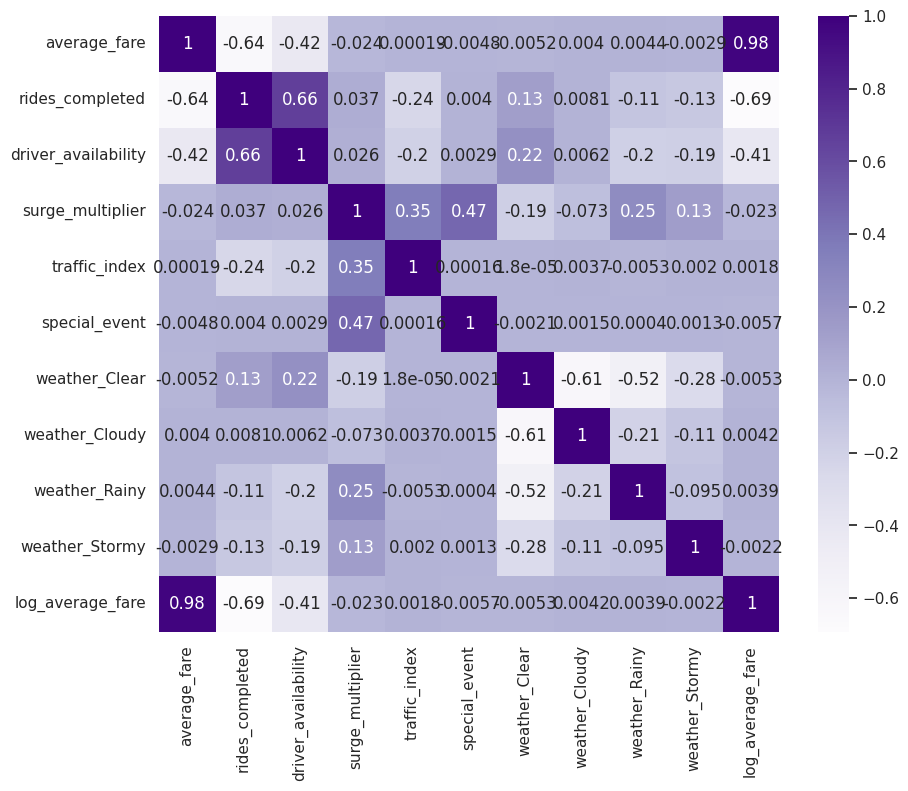

In [24]:
plt.figure(figsize=(10, 8))
corrm = train.corr(numeric_only=True)  
sns.heatmap(corrm, annot=True, cmap='Purples')
plt.show()

rides_completed and driver_availability: There is a moderate positive correlation (0.66) traffic_index and weather_Clear: There is a moderate negative correlation (-0.2) special_event variable has weak correlations with most other variable weather-related variables show some correlations with each other

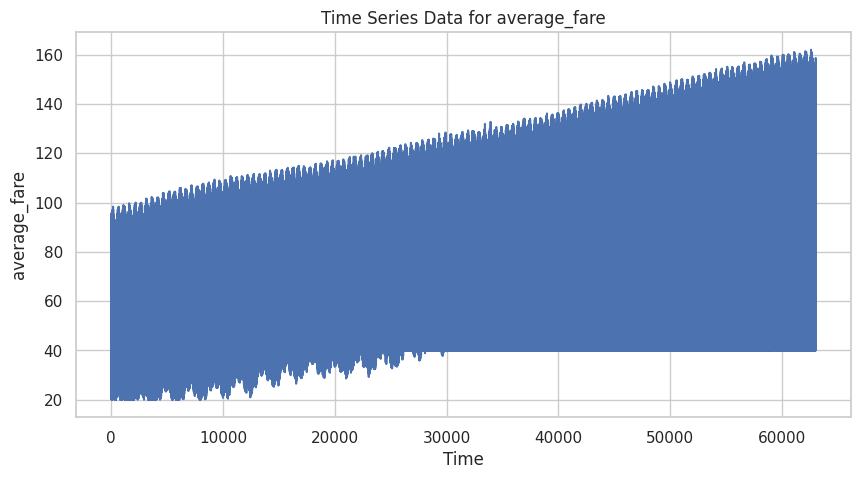

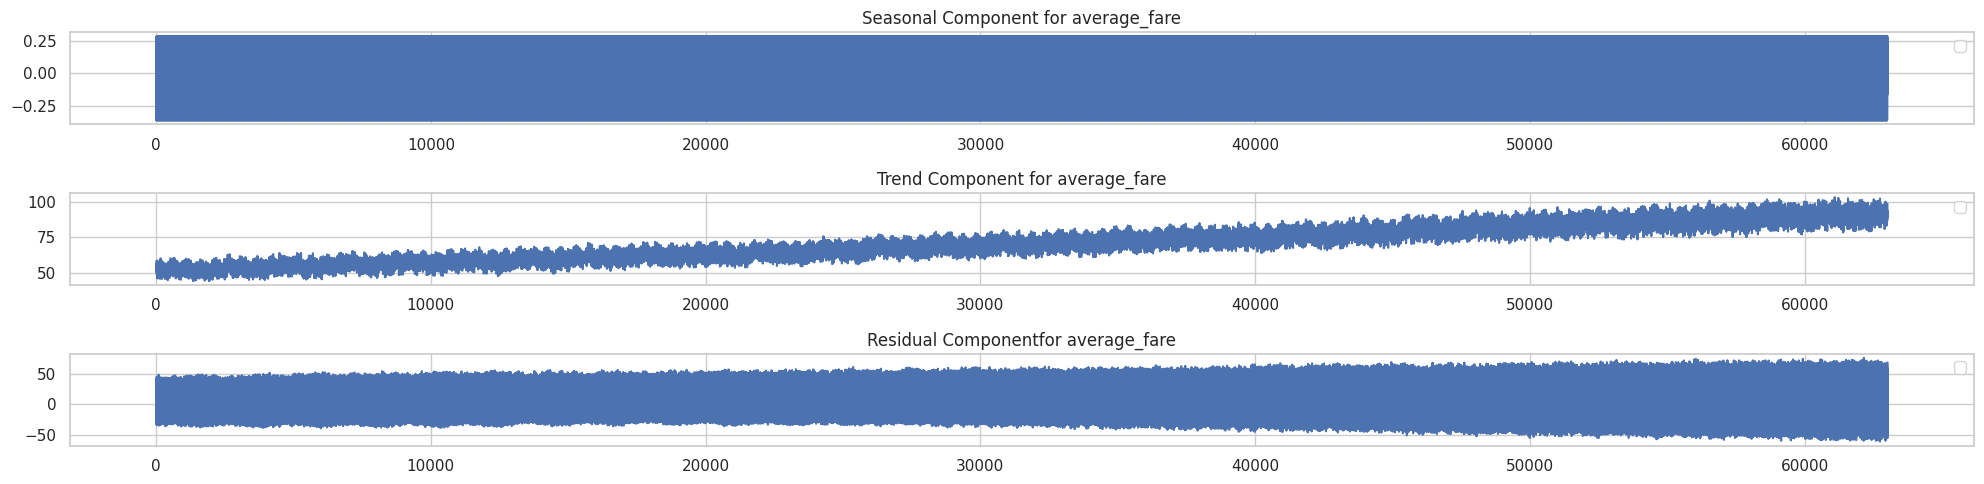

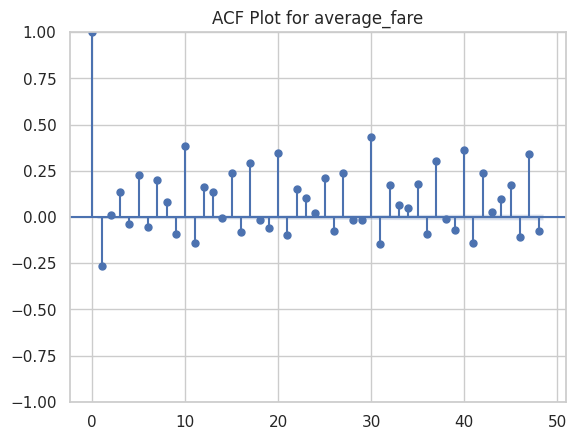

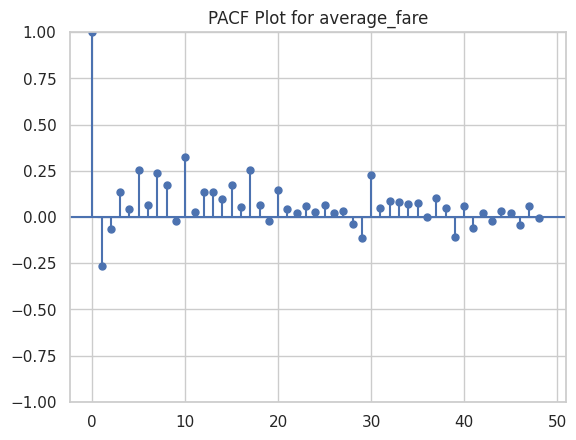

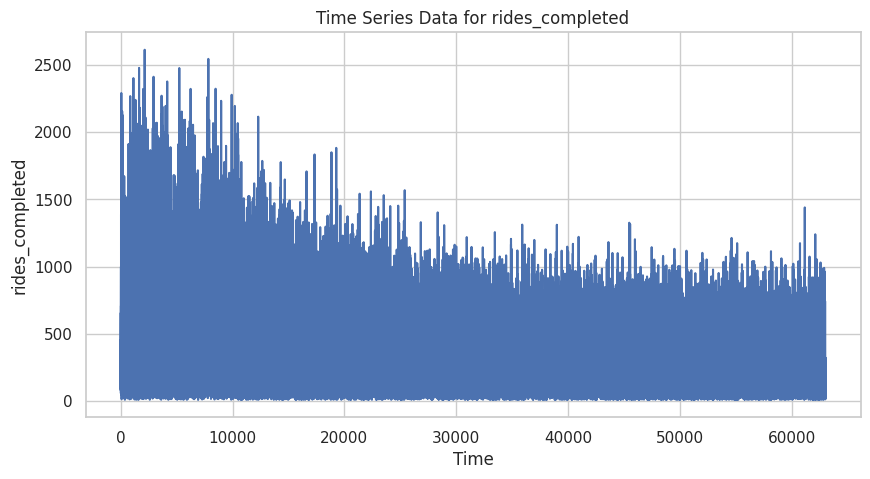

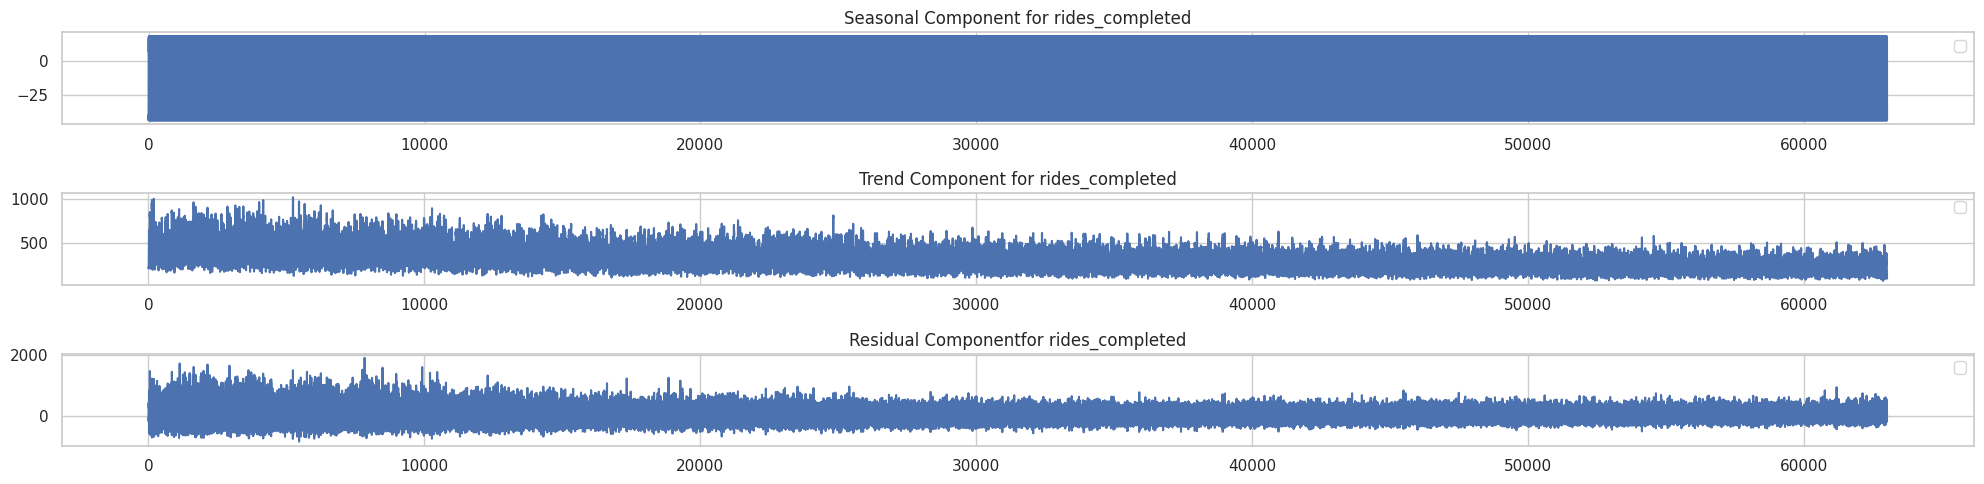

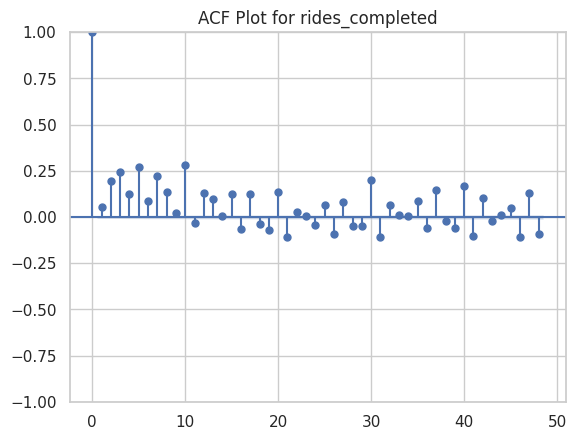

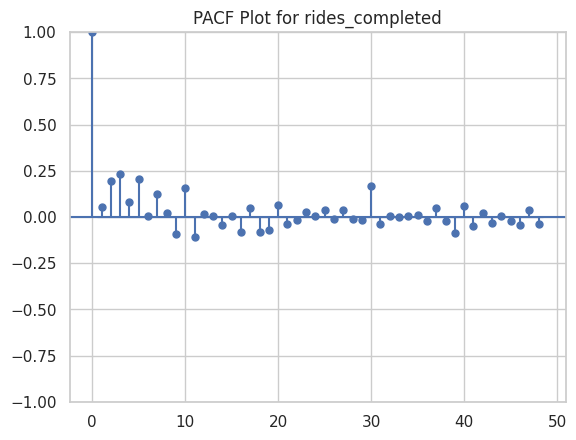

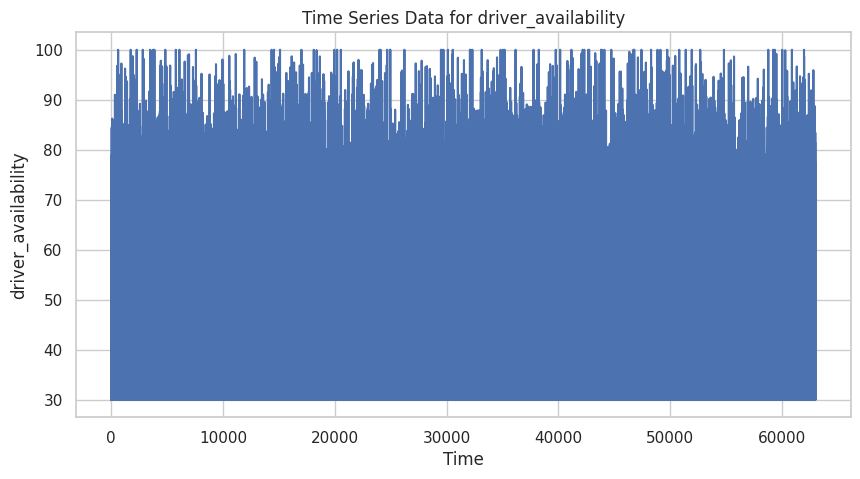

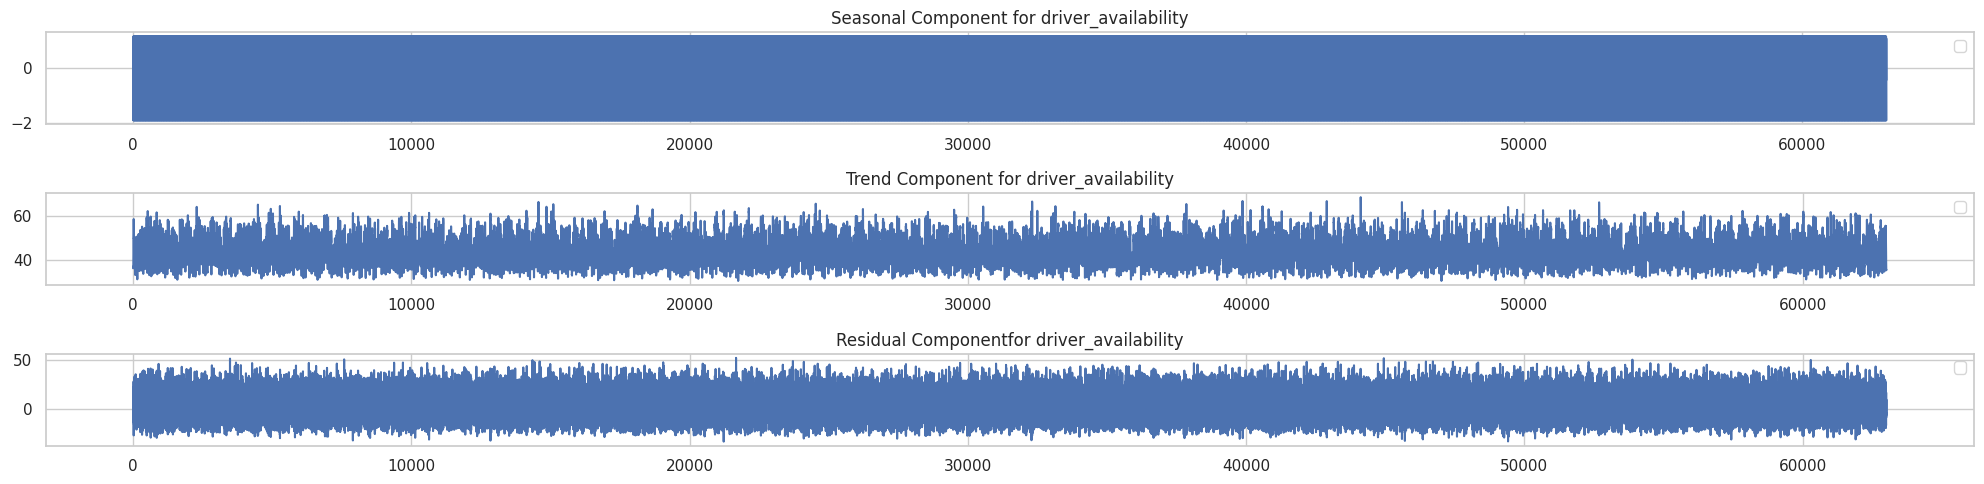

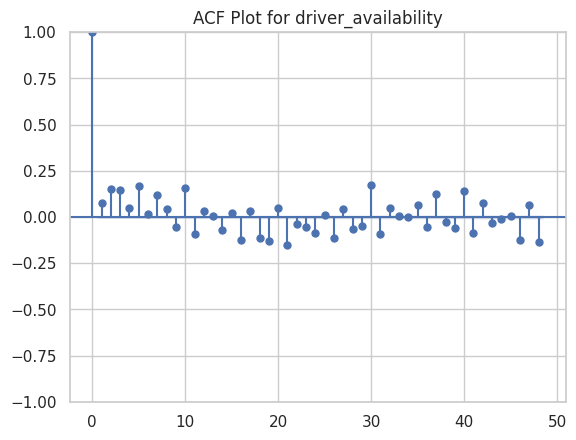

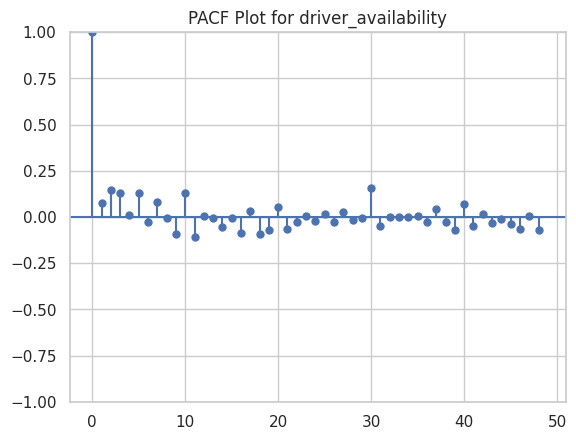

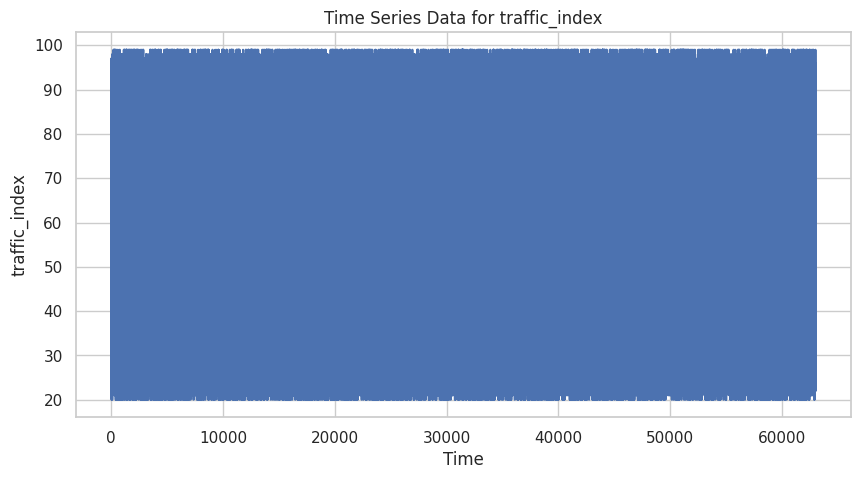

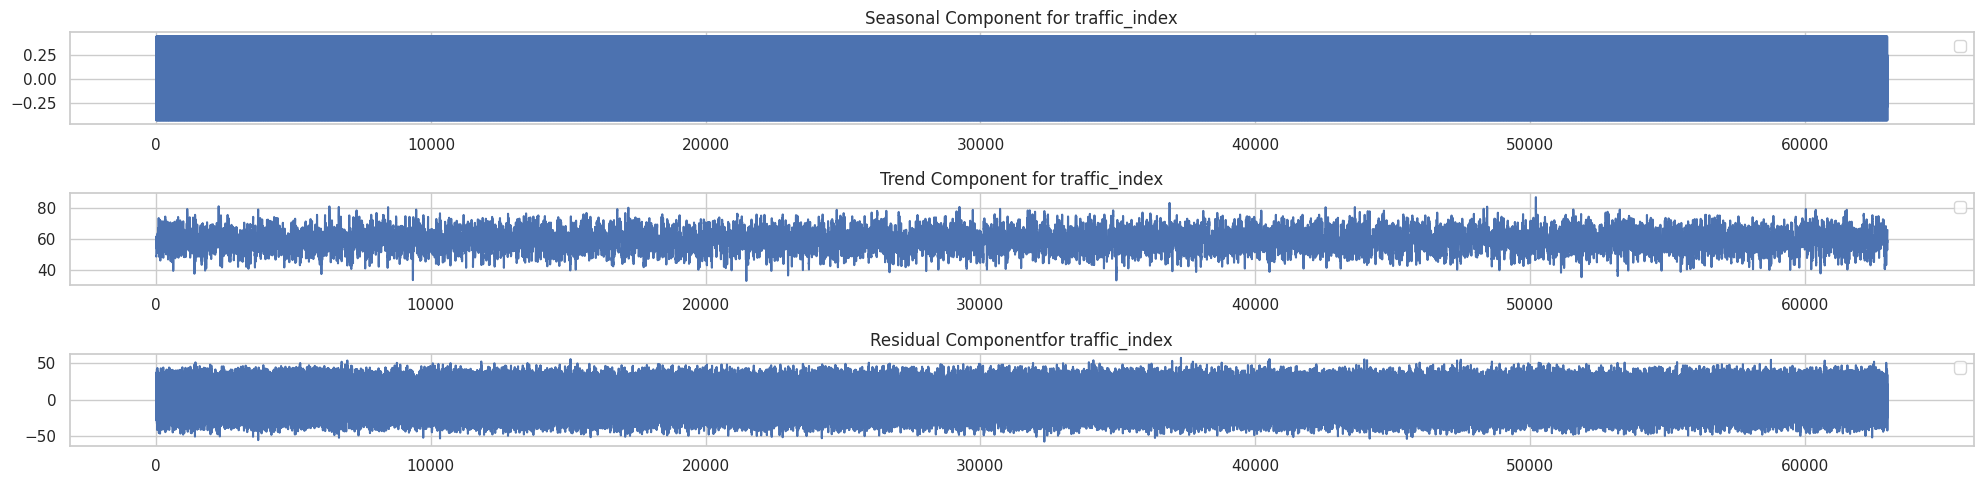

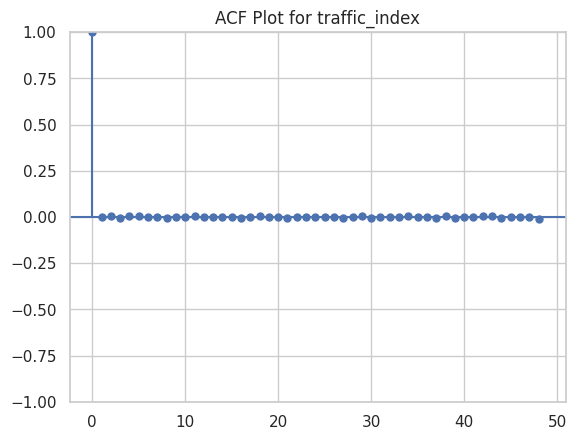

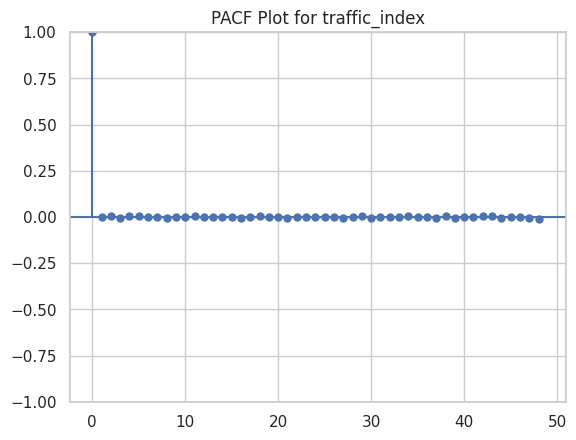

In [25]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
for i in ['average_fare','rides_completed','driver_availability','traffic_index']:
    s = sm.tsa.seasonal_decompose(train[i], period=12)

    plt.figure(figsize=(10, 5))
    plt.plot(train[i])
    plt.title(f'Time Series Data for {i}')
    plt.xlabel('Time')
    plt.ylabel(i)
    plt.show()
    
    plt.figure(figsize=(20, 5))
    plt.subplot(3, 1, 1)
    plt.plot(s.seasonal)
    plt.title(f"Seasonal Component for {i}")
    plt.legend()

    plt.subplot(3, 1, 2)
    plt.plot(s.trend)
    plt.title(f"Trend Component for {i}")
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.plot(s.resid)
    plt.title(f"Residual Componentfor {i}")
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    plot_acf(train[i])
    plt.title(f'ACF Plot for {i}')
    plt.show()
    
    plot_pacf(train[i])
    plt.title(f'PACF Plot for {i}')
    plt.show()
    
    print("\n\n\n")

 **FOR AVERAGE FARE:**
average_fare shows a clear upward trend over time

Seasonality plot shows that there is no seasonality

The trend component shows a slight upward trend as the average_fare has been increasing slowly over time.

The residual component shows a lot of noise and fluctuations. This indicates that there is significant variability in the data that is not explained by the trend or seasonal components.

 ACF plot shows a rapid decay of the autocorrelation coefficients. This indicates that the observations in the time series are not strongly correlated with past observations.current observation is not strongly influenced by past observations beyond the immediate past.

 PACF shows thaat There is a significant spike at lag 1. This suggests that the current observation is directly influenced by the immediately preceding observation.

**FOR RIDES COMPLETED:**


plot shows a clear downward trend, indicating that the number of rides completed has been decreasing over time

 The seasonal component is almost flat, indicating that there is no significant seasonal pattern in the data

 trend component shows a downward slope, confirming the overall decreasing trend observed in the original time series

 residual component shows a lot of noise and fluctuations, indicating that there is significant variability in the data

 ACF indicates that the observations in the time series are not strongly correlated with past observations.
 no significant lag either

 PACF shows significant spike at lag 1.

**FOR DRIVER AVAILABILITY:**
plot shows a relatively stable trend with some fluctuations


 no significant seasonal pattern 

 absence of a significant upward or downward trend

  significant variability in the data no explained by seasonality or trend

ACF observations in the time series are not strongly correlated with past observations. no lag either

PACF significant spike at lag 1

**FOR TRAFFIC INDEX:** 

 plot shows a relatively stable trend 

 no significant seasonal pattern in the data

 absence of a significant upward or downward trend in the data

  significant variability in the data that is not explained by the trend or seasonal components

  ACF shows observations in the time series are not strongly correlated with past observations and  no significant spikes beyond lag 1.

  PACF has significant lag at spike 1 showing that current observation is directly influenced by the immediately preceding observation.

### Task 2: Time Series Characterization (1 mark)

- Building on your exploratory analysis, examine the time series characteristics of the average fare for each vehicle type in Quahog City.
- Implement the Holt and Holt-Winters methods to model and forecast the average fare for each vehicle type.
- Interpret the results and discuss the implications for RideWave's business.

/opt/conda/lib/python3.10/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


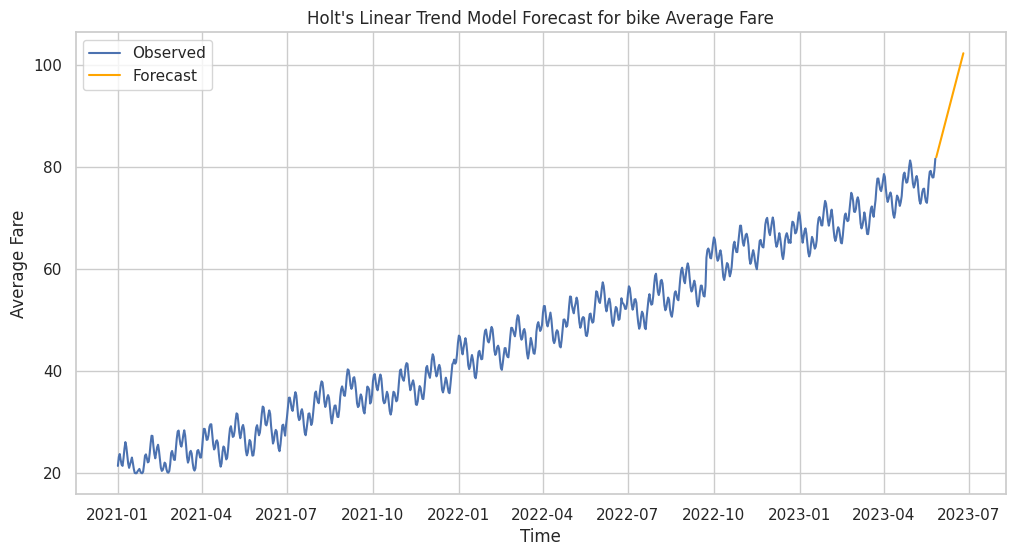

/opt/conda/lib/python3.10/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


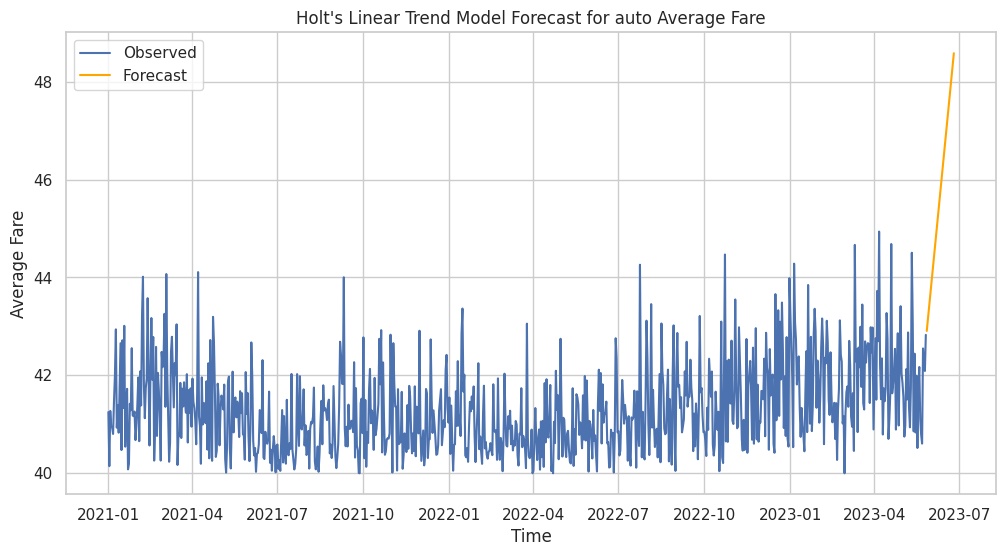

/opt/conda/lib/python3.10/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


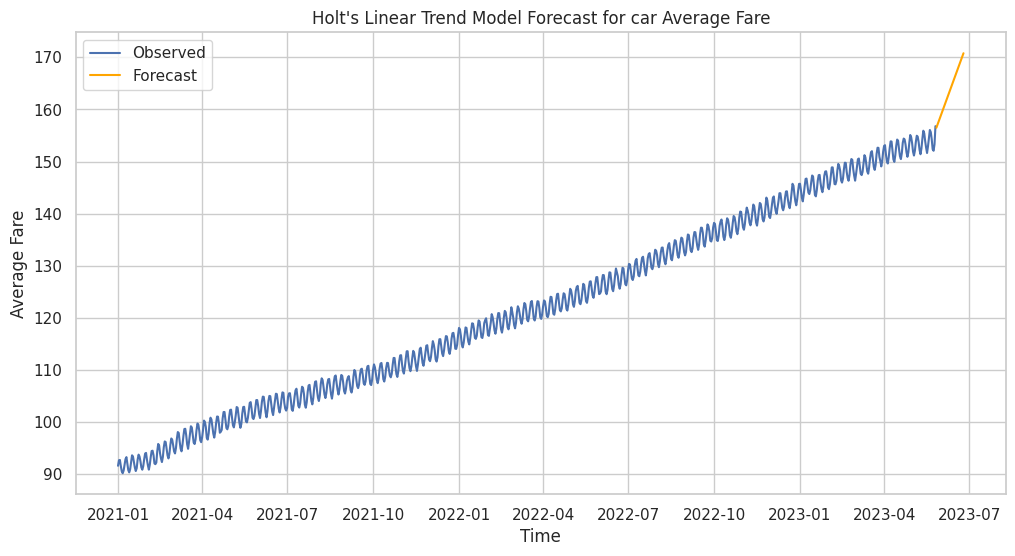

In [26]:
from statsmodels.tsa.holtwinters import Holt
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'timestamp' is set as the index and sorted for time series analysis
#train['timestamp'] = pd.to_datetime(train['timestamp'])

# Function to apply Holt’s Linear Trend Model and forecast with correct plotting
def holt_forecast_with_proper_alignment(vehicle_data, vehicle_type, forecast_periods=30):
    # Initialize and fit the model
    model = Holt(vehicle_data['average_fare'], exponential=False, damped_trend=False)
    fit = model.fit(smoothing_level=0.8, smoothing_slope=0.2)

    # Forecast future values
    forecast = fit.forecast(steps=forecast_periods)

    # Create a new index for forecast starting right after the observed data
    last_observed_date = vehicle_data['timestamp'].iloc[-1]
    forecast_index = pd.date_range(last_observed_date + pd.Timedelta(days=1), periods=forecast_periods, freq='D')

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(vehicle_data['timestamp'], vehicle_data['average_fare'], label='Observed')
    plt.plot(forecast_index, forecast, label='Forecast', color='orange')
    plt.title(f"Holt's Linear Trend Model Forecast for {vehicle_type} Average Fare")
    plt.xlabel("Time")
    plt.ylabel("Average Fare")
    plt.legend()
    plt.show()

# Filter data for each vehicle type, resample, and apply Holt's model with corrected alignment
for vehicle_type in ['bike', 'auto', 'car']:
    vehicle_data = train[train['vehicle_type'] == vehicle_type]
    
    # Drop non-numeric columns and resample
    numeric_data = vehicle_data.drop(columns=['vehicle_type', 'weather', 'special_event'], errors='ignore')
    numeric_data = numeric_data.set_index('timestamp').resample('D').mean().dropna(subset=['average_fare'])

    # Reset index to pass timestamp back into the function
    holt_forecast_with_proper_alignment(numeric_data.reset_index(), vehicle_type)


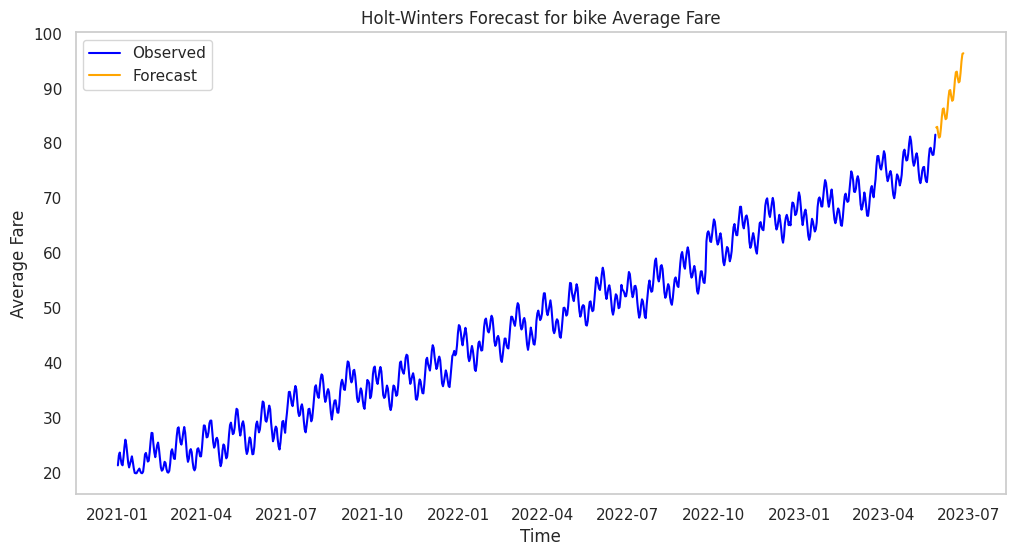

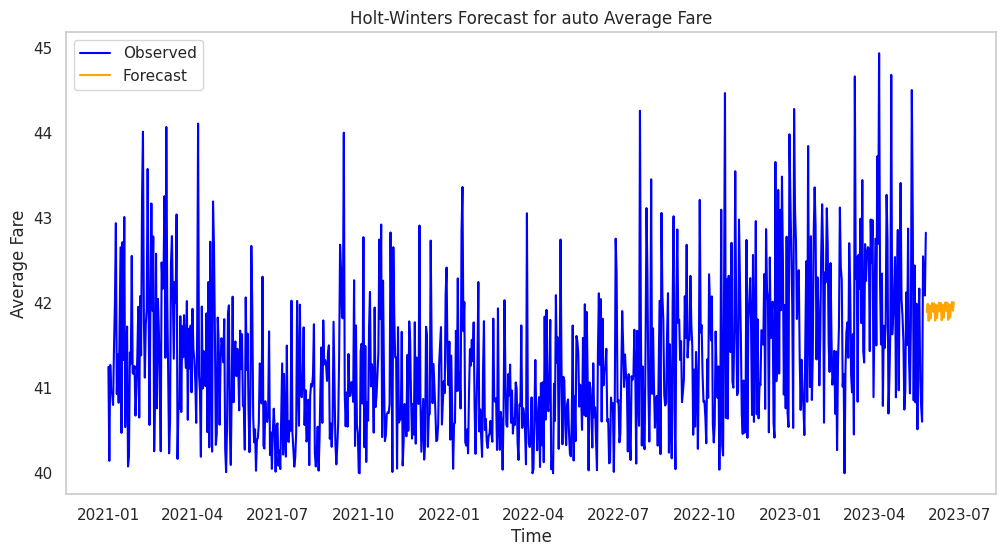

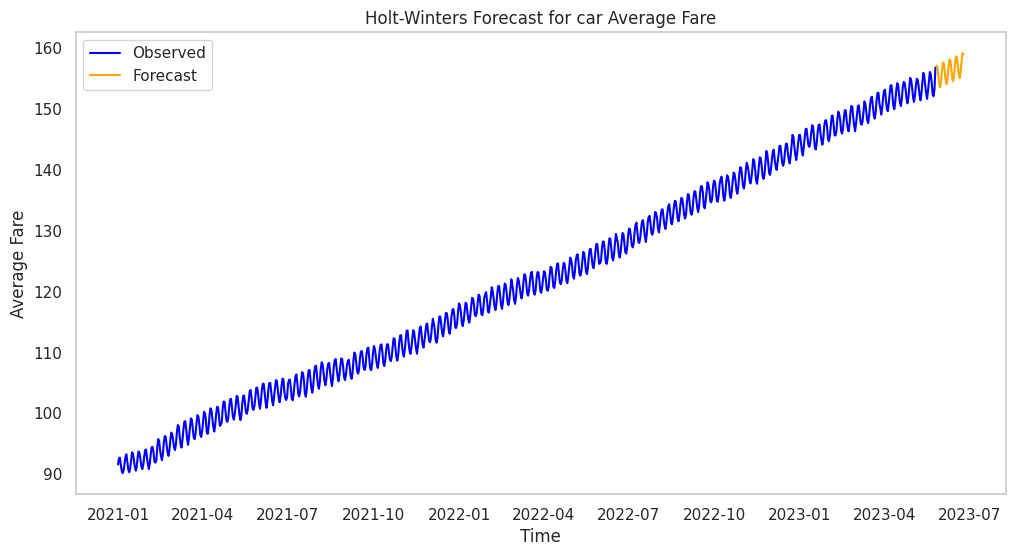

In [27]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'timestamp' is set as the index and sorted for time series analysis
#train['timestamp'] = pd.to_datetime(train['timestamp'])
#train = train.sort_values(by='timestamp')

# Function to apply Holt-Winters Seasonal Model and forecast with correct plotting
def holt_winters_forecast_with_proper_alignment(vehicle_data, vehicle_type, forecast_periods=30):
    # Initialize and fit the model with seasonal components
    model = ExponentialSmoothing(vehicle_data['average_fare'], trend='add', seasonal='add', seasonal_periods=7)  # Adjust seasonal_periods based on data
    fit = model.fit()

    # Forecast future values
    forecast = fit.forecast(steps=forecast_periods)

    # Create a new index for forecast starting right after the observed data
    last_observed_date = vehicle_data['timestamp'].iloc[-1]
    forecast_index = pd.date_range(last_observed_date + pd.Timedelta(days=1), periods=forecast_periods, freq='D')

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(vehicle_data['timestamp'], vehicle_data['average_fare'], label='Observed', color='blue')
    plt.plot(forecast_index, forecast, label='Forecast', color='orange')
    plt.title(f"Holt-Winters Forecast for {vehicle_type} Average Fare")
    plt.xlabel("Time")
    plt.ylabel("Average Fare")
    plt.legend()
    plt.grid()
    plt.show()

# Filter data for each vehicle type, resample, and apply Holt-Winters model with corrected alignment
for vehicle_type in ['bike', 'auto', 'car']:
    vehicle_data = train[train['vehicle_type'] == vehicle_type]
    
    # Drop non-numeric columns and resample
    numeric_data = vehicle_data.drop(columns=['vehicle_type', 'weather', 'special_event'], errors='ignore')
    numeric_data = numeric_data.set_index('timestamp').resample('D').mean().dropna(subset=['average_fare'])

    # Reset index to pass timestamp back into the function
    holt_winters_forecast_with_proper_alignment(numeric_data.reset_index(), vehicle_type)


In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Function to calculate accuracy metrics
def calculate_accuracy_metrics(actual, forecast):
    mae = mean_absolute_error(actual, forecast)
    mse = mean_squared_error(actual, forecast)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

# Function to calculate and display metrics for Holt's Linear Trend Model
def holt_forecast_accuracy(vehicle_data, forecast_periods=30):
    # Split data into train and test
    train_data = vehicle_data[:-forecast_periods]
    test_data = vehicle_data[-forecast_periods:]
    
    # Fit model and forecast
    model = Holt(train_data['average_fare'], exponential=False, damped_trend=False)
    fit = model.fit(smoothing_level=0.8, smoothing_slope=0.2)
    forecast = fit.forecast(steps=forecast_periods)
    
    # Calculate accuracy metrics
    mae, mse, rmse = calculate_accuracy_metrics(test_data['average_fare'], forecast)
    print(f"Holt's Linear Model - MAE: {mae}, MSE: {mse}, RMSE: {rmse}")

# Function to calculate and display metrics for Holt-Winters Seasonal Model
def holt_winters_forecast_accuracy(vehicle_data, forecast_periods=30):
    # Split data into train and test
    train_data = vehicle_data[:-forecast_periods]
    test_data = vehicle_data[-forecast_periods:]
    
    # Fit model and forecast
    model = ExponentialSmoothing(train_data['average_fare'], trend='add', seasonal='add', seasonal_periods=7)
    fit = model.fit()
    forecast = fit.forecast(steps=forecast_periods)
    
    # Calculate accuracy metrics
    mae, mse, rmse = calculate_accuracy_metrics(test_data['average_fare'], forecast)
    print(f"Holt-Winters Model - MAE: {mae}, MSE: {mse}, RMSE: {rmse}")

# Run accuracy calculations for each vehicle type
for vehicle_type in ['bike', 'auto', 'car']:
    vehicle_data = train[train['vehicle_type'] == vehicle_type]
    numeric_data = vehicle_data.drop(columns=['vehicle_type', 'weather', 'special_event'], errors='ignore')
    numeric_data = numeric_data.set_index('timestamp').resample('D').mean().dropna(subset=['average_fare'])
    
    print(f"\nAccuracy metrics for {vehicle_type.capitalize()} - Holt's Linear Model:")
    holt_forecast_accuracy(numeric_data)
    
    print(f"\nAccuracy metrics for {vehicle_type.capitalize()} - Holt-Winters Model:")
    holt_winters_forecast_accuracy(numeric_data)


Accuracy metrics for Bike - Holt's Linear Model:
Holt's Linear Model - MAE: 3.3204841908286453, MSE: 15.169288770933328, RMSE: 3.8947771144101853

Accuracy metrics for Bike - Holt-Winters Model:


/opt/conda/lib/python3.10/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


Holt-Winters Model - MAE: 7.146094362123193, MSE: 64.60915089584438, RMSE: 8.037981767573523

Accuracy metrics for Auto - Holt's Linear Model:
Holt's Linear Model - MAE: 2.9869560787775753, MSE: 11.102423919391235, RMSE: 3.3320299997735967

Accuracy metrics for Auto - Holt-Winters Model:


/opt/conda/lib/python3.10/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


Holt-Winters Model - MAE: 0.7738290995805985, MSE: 0.9257316069759842, RMSE: 0.9621494722630077

Accuracy metrics for Car - Holt's Linear Model:
Holt's Linear Model - MAE: 7.848577571105191, MSE: 74.8909368624741, RMSE: 8.653954983848374

Accuracy metrics for Car - Holt-Winters Model:


/opt/conda/lib/python3.10/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


Holt-Winters Model - MAE: 0.5391656446489643, MSE: 0.3776985154590058, RMSE: 0.6145718147287637


**Model Performance Comparison:**

The Holt-Winters model has provided more accurate forecasts than Holt’s Linear Model for all vehicle types, as indicated by lower Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). This suggests that seasonal patterns are present in the average fare data, which the Holt-Winters model, with its ability to capture seasonality, models effectively.

**Vehicle Type Analysis:**

•⁠  ⁠Bike fares show higher volatility, with a relatively high MSE (64.61) and RMSE (8.03) in the Holt-Winters model. This variability may stem from external factors such as weather and traffic, which impact bike availability and fare rates unpredictably.
•⁠  ⁠Auto fares are more predictable, as shown by the Holt-Winters model’s low MAE (0.77) and MSE (0.92). This consistency suggests autos could be a stable revenue stream for RideWave, with reliable seasonal trends.
•⁠  ⁠Car fares also exhibit stability, with low MSE (0.37) and RMSE (0.61), indicating a predictable demand pattern similar to autos. This stability implies potential for consistent revenue from car services.
  
**Implications for Business Strategy:**

The predictability in auto and car fares suggests that RideWave could focus on these services for stable revenue, utilizing the Holt-Winters model for demand forecasting and resource allocation.
The high variability in bike fares indicates a need for real-time data integration (e.g., weather, traffic) to improve forecasting accuracy for bikes. This could aid in dynamic pricing and operational planning for this service type.
Overall, applying the Holt-Winters model for forecasting provides a solid foundation for strategic planning by leveraging seasonality in fare trends, helping optimize RideWave’s pricing, demand management, and fleet allocation strategies.

### Task 3: Advanced Forecasting and Feature Engineering (1 mark)

Leveraging insights from Tasks 1 and 2, develop more sophisticated time series models to forecast future average fares for each vehicle type.
- Implement at least one advanced forecasting method (e.g., ARIMA/ARIMAX, SARIMA/SARIMAX, or another technique of your choice).
- Perform feature engineering to incorporate additional relevant variables beyond just the time component to enhance your fare predictions.
- After completing your feature engineering process, list and explain the top 3 most influential features that affect fare predictions, supported by appropriate metrics or visualizations.
- Explain your choice of forecasting method and the rationale behind your feature engineering process.
- Interpret your model results and fare forecasts, relating them to RideWave's operations and the dynamics of fare pricing across different vehicle types.

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

def evaluate_forecast(actual, forecast):
    rmse = np.sqrt(mean_squared_error(actual, forecast))
    mae = mean_absolute_error(actual, forecast)
    mape = mean_absolute_percentage_error(actual, forecast)
    
    return {
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape * 100  # Convert to percentage
    }

In [30]:
def analyze_feature_importance(model):
    # Extract the model’s exogenous variable names and corresponding coefficients
    exog_names = model.model.exog_names[1:]  # Skipping intercept
    coefficients = model.params[1:]  # Skipping intercept
    
    # Ensure matching lengths by only taking the minimum length of both lists
    min_length = min(len(exog_names), len(coefficients))
    exog_names = exog_names[:min_length]
    coefficients = coefficients[:min_length]
    
    # Create a DataFrame for feature importance
    coef_df = pd.DataFrame({
        'feature': exog_names,
        'coefficient': coefficients,
        'abs_importance': np.abs(coefficients)
    })
    
    return coef_df.sort_values('abs_importance', ascending=False)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ARIMAX Model Metrics:
RMSE: 7.964138015778539
MAE: 6.64806494371952
MAPE: 4.388482954291217


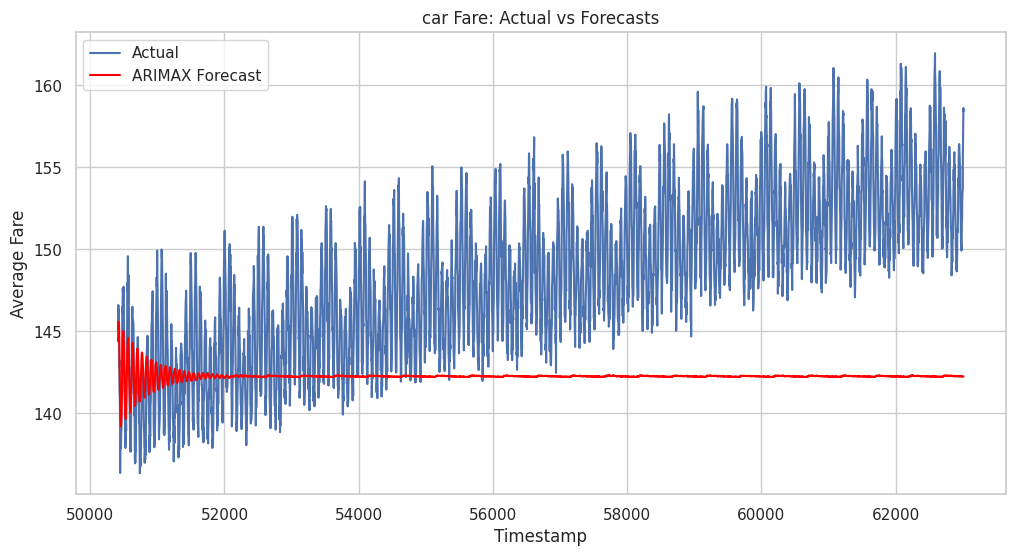

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integ

ARIMAX Model Metrics:
RMSE: 2.308090021488037
MAE: 1.786547405968808
MAPE: 4.130855654924301


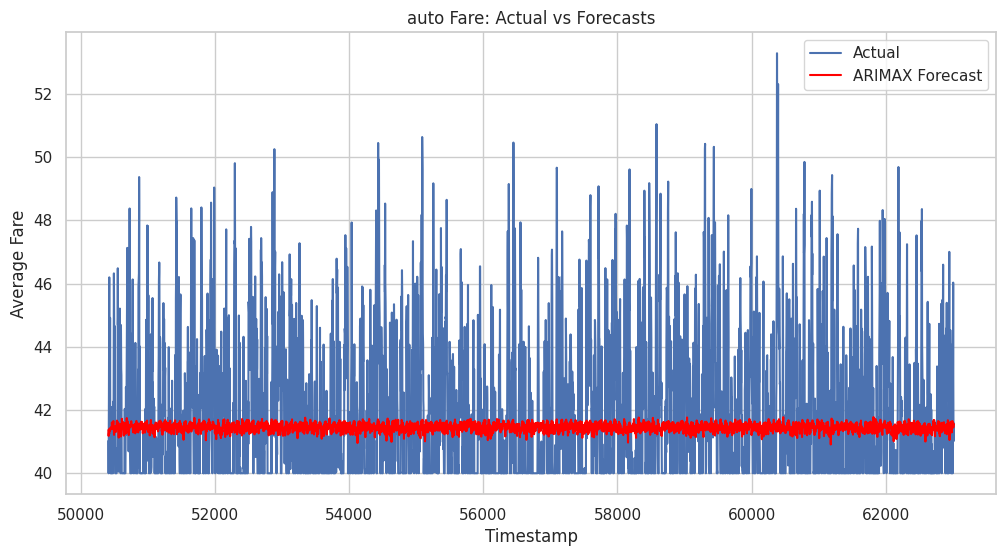

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ARIMAX Model Metrics:
RMSE: 5.194638251940777
MAE: 4.199581800144406
MAPE: 5.762013165586503


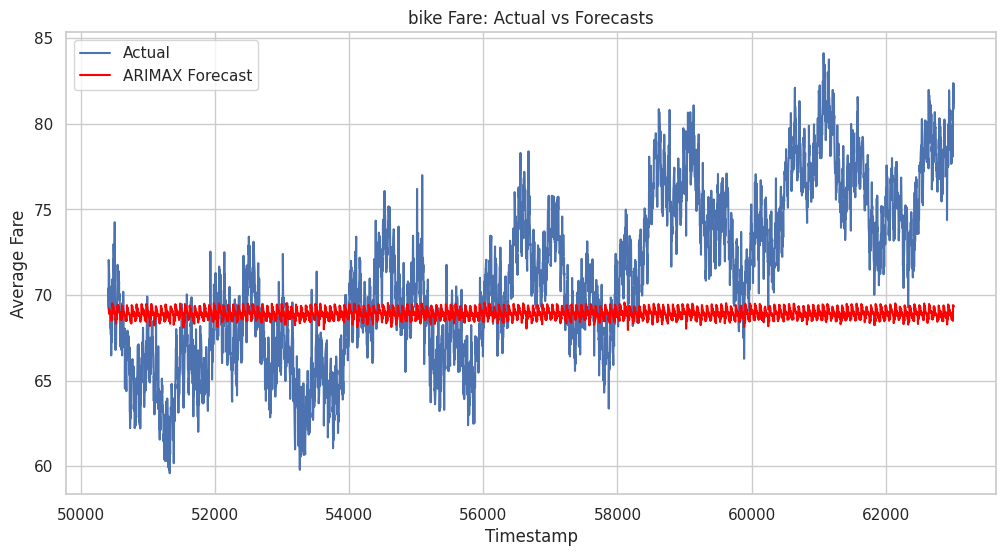

In [31]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

def prepare_data(df,type):
    # Convert timestamp and filter bike data
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    bike_df = df[df['vehicle_type'] == type]
    
    # Prepare time series and exogenous variables
    time_series = bike_df['average_fare']
    
    # Feature engineering for exogenous variables
    exog_vars = pd.DataFrame({
        'surge_multiplier': bike_df['surge_multiplier'],
        'rides_completed': bike_df['rides_completed'],
        'traffic_index': bike_df['traffic_index'],
        'hour': bike_df['timestamp'].dt.hour,
        'day_of_week': bike_df['timestamp'].dt.dayofweek
    })
    
    return time_series, exog_vars

def fit_arimax_model(train_series, train_exog, test_exog):
    # Fit ARIMAX (non-seasonal)
    arimax_model = sm.tsa.ARIMA(
        train_series, 
        exog=train_exog,
        order=(2, 1, 2)  # ARIMA order (p,d,q)
    ).fit()
    
    # Forecast
    arimax_forecast = arimax_model.forecast(
        steps=len(test_exog), 
        exog=test_exog
    )
    
    return arimax_model, arimax_forecast


df = train.copy()

for i in ['car','auto','bike']:

    time_series, exog_vars = prepare_data(df,i)
    
    scaler = StandardScaler()
    exog_scaled = pd.DataFrame(
        scaler.fit_transform(exog_vars), 
        columns=exog_vars.columns,
        index=exog_vars.index
    )
    
    train_size = int(len(time_series) * 0.8)
    train_series = time_series[:train_size]
    test_series = time_series[train_size:]
    train_exog = exog_scaled[:train_size]
    test_exog = exog_scaled[train_size:]
    
    # Fit ARIMAX Model
    arimax_model, arimax_forecast = fit_arimax_model( train_series, train_exog, test_exog )
    
    # Evaluate Models
    print("ARIMAX Model Metrics:")
    arimax_metrics = evaluate_forecast(test_series, arimax_forecast)
    for metric, value in arimax_metrics.items():
        print(f"{metric}: {value}")
    
    # Visualization
    plt.figure(figsize=(12, 6))
    plt.plot(test_series.index, test_series.values, label='Actual')
    plt.plot(test_series.index, arimax_forecast, label='ARIMAX Forecast', color='red')
    plt.title(f'{i} Fare: Actual vs Forecasts')
    plt.xlabel('Timestamp')
    plt.ylabel('Average Fare')
    plt.legend()
    plt.show()

In [32]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd

# Assuming 'train' is your DataFrame with 'average_fare' as the target column

# Separate features and target variable
X_train = train.drop(columns=['average_fare'])  # Exclude the target column
y_train = train['average_fare']  # Target column

# Identify categorical and datetime columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
datetime_cols = X_train.select_dtypes(include=['datetime64']).columns

# Drop datetime columns if they are not needed
X_train = X_train.drop(columns=datetime_cols)

# Define preprocessing steps for numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X_train.select_dtypes(include=['float64', 'int64']).columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the training data
X_train_preprocessed = pipeline.fit_transform(X_train)

# Convert the processed data back to a DataFrame and concatenate with the target
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed)
train_standardized = pd.concat([X_train_preprocessed_df, y_train.reset_index(drop=True)], axis=1)

# Display the first few rows of the standardized training data
print(train_standardized.head())

          0         1         2         3         4         5         6  \
0  0.264892  0.292101 -0.980211  0.150528 -0.333877  0.814716 -0.499851   
1 -0.979364 -0.959116 -0.980211 -0.281391 -0.333877  0.814716 -0.499851   
2 -0.454598 -0.364526 -0.980211 -1.058845 -0.333877  0.814716 -0.499851   
3 -0.778039 -0.959116  0.949802  1.014366 -0.333877 -1.227421 -0.499851   
4 -0.919956 -0.959116 -0.980211 -1.447573 -0.333877  0.814716 -0.499851   

         7         8         9   10   11   12  average_fare  
0 -0.42094 -0.225839 -1.952482  0.0  1.0  0.0     20.780423  
1 -0.42094 -0.225839  0.733237  0.0  0.0  1.0     90.000000  
2 -0.42094 -0.225839 -0.698566  1.0  0.0  0.0     41.197085  
3 -0.42094  4.427935 -1.953204  0.0  1.0  0.0     20.772227  
4 -0.42094 -0.225839  0.752875  0.0  0.0  1.0     90.969805  


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


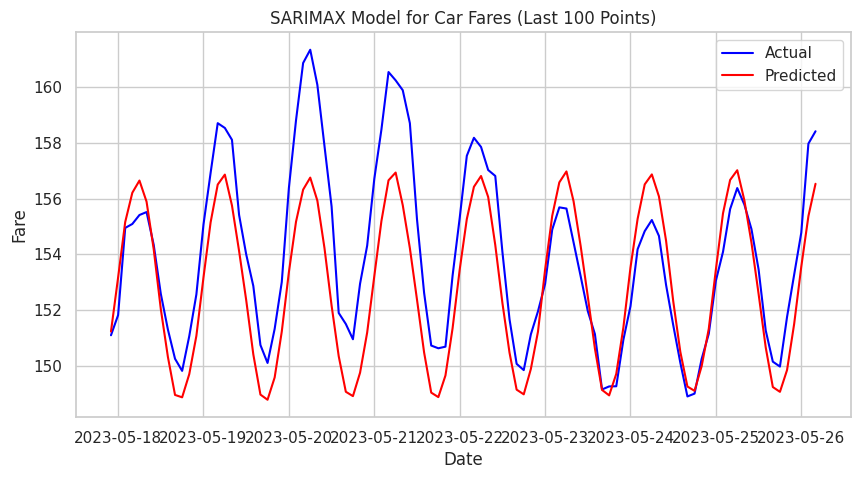


Model Metrics for Cars:
RMSE: 1.961732
MAE: 1.579286


In [33]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

def analyze_car_fares(df, sample_freq='H', max_samples=2000):
    """
    Analyze and forecast car fares using ARIMAX model with performance optimizations
    
    Parameters:
    df (pd.DataFrame): Input DataFrame containing ride data
    sample_freq (str): Resampling frequency ('H' for hourly, '2H' for every 2 hours, etc.)
    max_samples (int): Maximum number of samples to use for training
    
    Returns:
    statsmodels.tsa.statespace.sarimax.SARIMAXResults: Fitted model
    """
    # Filter data for cars only and make a copy only of required columns
    required_columns = ['timestamp', 'average_fare', 'surge_multiplier', 
                       'rides_completed', 'driver_availability', 
                       'traffic_index', 'special_event']
    car_data = df[df['vehicle_type'] == 'car'][required_columns].copy()
    
    # Convert timestamp to datetime and set as index
    car_data['timestamp'] = pd.to_datetime(car_data['timestamp'])
    car_data.set_index('timestamp', inplace=True)
    
    # Resample data to reduce dataset size
    average_fare_series = car_data['average_fare'].resample(sample_freq).mean()
    
    exog_columns = [
        'surge_multiplier',
        'rides_completed',
        'driver_availability',
        'traffic_index',
        'special_event'
    ]
    exogenous_vars = car_data[exog_columns].resample(sample_freq).mean()
    
    # Limit dataset size if necessary
    if len(average_fare_series) > max_samples:
        average_fare_series = average_fare_series[-max_samples:]
        exogenous_vars = exogenous_vars[-max_samples:]
    
    # Remove any NaN values
    average_fare_series = average_fare_series.dropna()
    exogenous_vars = exogenous_vars.dropna()
    
    # Ensure indexes match
    common_index = average_fare_series.index.intersection(exogenous_vars.index)
    average_fare_series = average_fare_series[common_index]
    exogenous_vars = exogenous_vars.loc[common_index]
    
    # Split data into training and testing sets (80/20)
    train_size = int(len(average_fare_series) * 0.8)
    train = average_fare_series[:train_size]
    test = average_fare_series[train_size:]
    exog_train = exogenous_vars[:train_size]
    exog_test = exogenous_vars[train_size:]
    
    # Simplify SARIMAX model parameters
    model = SARIMAX(
        train,
        exog=exog_train,
        order=(2, 1, 2),           # Simplified ARIMA order
        seasonal_order=(1, 1, 1, 24),  # Simplified seasonal order
        enforce_stationarity=False,
        enforce_invertibility=False
    )
    
    # Fit model with simplified optimization
    model_fit = model.fit(disp=False, maxiter=50)
    
    # Generate predictions
    predictions = model_fit.forecast(steps=len(test), exog=exog_test)
    
    # Calculate only essential metrics
    metrics = {
        'RMSE': np.sqrt(mean_squared_error(test, predictions)),
        'MAE': mean_absolute_error(test, predictions)
    }
    
    # Create simplified visualization
    plt.figure(figsize=(10, 5))
    plt.plot(test.index[-100:], test[-100:], label='Actual', color='blue')
    plt.plot(test.index[-100:], predictions[-100:], label='Predicted', color='red')
    plt.title('SARIMAX Model for Car Fares (Last 100 Points)')
    plt.xlabel('Date')
    plt.ylabel('Fare')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Print metrics
    print("\nModel Metrics for Cars:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.6f}")
    
    return model_fit

# Usage example with optimization settings:
model_sariax_car = analyze_car_fares(train, sample_freq='2H', max_samples=1000)

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


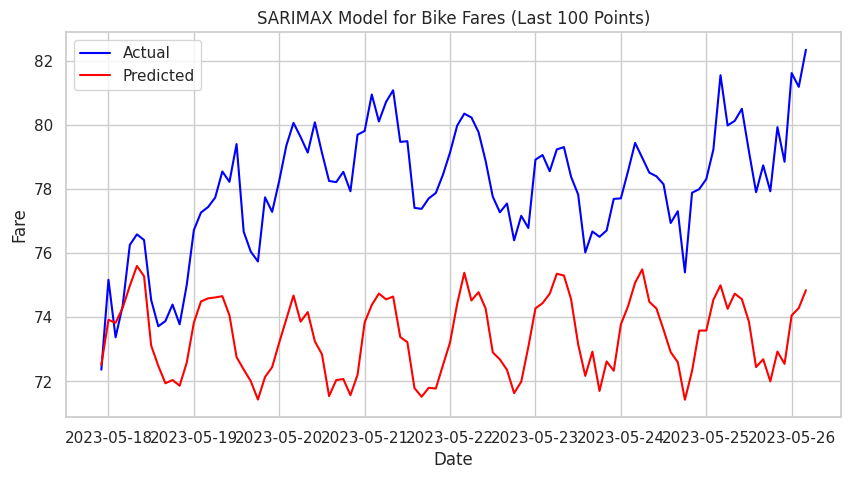


Model Metrics for Cars:
RMSE: 3.657177
MAE: 2.897273


In [34]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

def analyze_bike_fares(df, sample_freq='H', max_samples=2000):
    """
    Analyze and forecast car fares using ARIMAX model with performance optimizations
    
    Parameters:
    df (pd.DataFrame): Input DataFrame containing ride data
    sample_freq (str): Resampling frequency ('H' for hourly, '2H' for every 2 hours, etc.)
    max_samples (int): Maximum number of samples to use for training
    
    Returns:
    statsmodels.tsa.statespace.sarimax.SARIMAXResults: Fitted model
    """
    # Filter data for cars only and make a copy only of required columns
    required_columns = ['timestamp', 'average_fare', 'surge_multiplier', 
                       'rides_completed', 'driver_availability', 
                       'traffic_index', 'special_event']
    car_data = df[df['vehicle_type'] == 'bike'][required_columns].copy()
    
    # Convert timestamp to datetime and set as index
    car_data['timestamp'] = pd.to_datetime(car_data['timestamp'])
    car_data.set_index('timestamp', inplace=True)
    
    # Resample data to reduce dataset size
    average_fare_series = car_data['average_fare'].resample(sample_freq).mean()
    
    exog_columns = [
        'surge_multiplier',
        'rides_completed',
        'driver_availability',
        'traffic_index',
        'special_event'
    ]
    exogenous_vars = car_data[exog_columns].resample(sample_freq).mean()
    
    # Limit dataset size if necessary
    if len(average_fare_series) > max_samples:
        average_fare_series = average_fare_series[-max_samples:]
        exogenous_vars = exogenous_vars[-max_samples:]
    
    # Remove any NaN values
    average_fare_series = average_fare_series.dropna()
    exogenous_vars = exogenous_vars.dropna()
    
    # Ensure indexes match
    common_index = average_fare_series.index.intersection(exogenous_vars.index)
    average_fare_series = average_fare_series[common_index]
    exogenous_vars = exogenous_vars.loc[common_index]
    
    # Split data into training and testing sets (80/20)
    train_size = int(len(average_fare_series) * 0.8)
    train = average_fare_series[:train_size]
    test = average_fare_series[train_size:]
    exog_train = exogenous_vars[:train_size]
    exog_test = exogenous_vars[train_size:]
    
    # Simplify SARIMAX model parameters
    model = SARIMAX(
        train,
        exog=exog_train,
        order=(2, 1, 2),           # Simplified ARIMA order
        seasonal_order=(1, 1, 1, 24),  # Simplified seasonal order
        enforce_stationarity=False,
        enforce_invertibility=False
    )
    
    # Fit model with simplified optimization
    model_fit = model.fit(disp=False, maxiter=50)
    
    # Generate predictions
    predictions = model_fit.forecast(steps=len(test), exog=exog_test)
    
    # Calculate only essential metrics
    metrics = {
        'RMSE': np.sqrt(mean_squared_error(test, predictions)),
        'MAE': mean_absolute_error(test, predictions)
    }
    
    # Create simplified visualization
    plt.figure(figsize=(10, 5))
    plt.plot(test.index[-100:], test[-100:], label='Actual', color='blue')
    plt.plot(test.index[-100:], predictions[-100:], label='Predicted', color='red')
    plt.title('SARIMAX Model for Bike Fares (Last 100 Points)')
    plt.xlabel('Date')
    plt.ylabel('Fare')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Print metrics
    print("\nModel Metrics for Cars:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.6f}")
    
    return model_fit

# Usage example with optimization settings:
model_sariax_bike = analyze_bike_fares(train, sample_freq='2H', max_samples=1000)

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


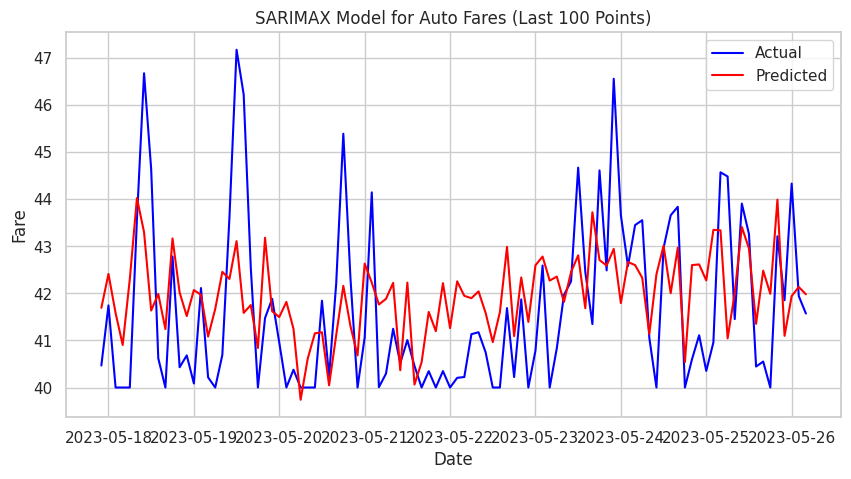


Model Metrics for Auto:
RMSE: 1.710288
MAE: 1.382931


In [35]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

def analyze_auto_fares(df, sample_freq='H', max_samples=2000):
    """
    Analyze and forecast car fares using ARIMAX model with performance optimizations
    
    Parameters:
    df (pd.DataFrame): Input DataFrame containing ride data
    sample_freq (str): Resampling frequency ('H' for hourly, '2H' for every 2 hours, etc.)
    max_samples (int): Maximum number of samples to use for training
    
    Returns:
    statsmodels.tsa.statespace.sarimax.SARIMAXResults: Fitted model
    """
    # Filter data for cars only and make a copy only of required columns
    required_columns = ['timestamp', 'average_fare', 'surge_multiplier', 
                       'rides_completed', 'driver_availability', 
                       'traffic_index', 'special_event']
    car_data = df[df['vehicle_type'] == 'auto'][required_columns].copy()
    
    # Convert timestamp to datetime and set as index
    car_data['timestamp'] = pd.to_datetime(car_data['timestamp'])
    car_data.set_index('timestamp', inplace=True)
    
    # Resample data to reduce dataset size
    average_fare_series = car_data['average_fare'].resample(sample_freq).mean()
    
    exog_columns = [
        'surge_multiplier',
        'rides_completed',
        'driver_availability',
        'traffic_index',
        'special_event'
    ]
    exogenous_vars = car_data[exog_columns].resample(sample_freq).mean()
    
    # Limit dataset size if necessary
    if len(average_fare_series) > max_samples:
        average_fare_series = average_fare_series[-max_samples:]
        exogenous_vars = exogenous_vars[-max_samples:]
    
    # Remove any NaN values
    average_fare_series = average_fare_series.dropna()
    exogenous_vars = exogenous_vars.dropna()
    
    # Ensure indexes match
    common_index = average_fare_series.index.intersection(exogenous_vars.index)
    average_fare_series = average_fare_series[common_index]
    exogenous_vars = exogenous_vars.loc[common_index]
    
    # Split data into training and testing sets (80/20)
    train_size = int(len(average_fare_series) * 0.8)
    train = average_fare_series[:train_size]
    test = average_fare_series[train_size:]
    exog_train = exogenous_vars[:train_size]
    exog_test = exogenous_vars[train_size:]
    
    # Simplify SARIMAX model parameters
    model = SARIMAX(
        train,
        exog=exog_train,
        order=(2, 1, 2),           # Simplified ARIMA order
        seasonal_order=(1, 1, 1, 24),  # Simplified seasonal order
        enforce_stationarity=False,
        enforce_invertibility=False
    )
    
    # Fit model with simplified optimization
    model_fit = model.fit(disp=False, maxiter=50)
    
    # Generate predictions
    predictions = model_fit.forecast(steps=len(test), exog=exog_test)
    
    # Calculate only essential metrics
    metrics = {
        'RMSE': np.sqrt(mean_squared_error(test, predictions)),
        'MAE': mean_absolute_error(test, predictions)
    }
    
    # Create simplified visualization
    plt.figure(figsize=(10, 5))
    plt.plot(test.index[-100:], test[-100:], label='Actual', color='blue')
    plt.plot(test.index[-100:], predictions[-100:], label='Predicted', color='red')
    plt.title('SARIMAX Model for Auto Fares (Last 100 Points)')
    plt.xlabel('Date')
    plt.ylabel('Fare')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Print metrics
    print("\nModel Metrics for Auto:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.6f}")
    
    return model_fit

# Usage example with optimization settings:
model_sariax_auto = analyze_auto_fares(train, sample_freq='2H', max_samples=1000)

**Model Selection**

ARIMAX and SARIMAX models were chosen for their ability to integrate time series forecasting with external variables, making them ideal for predicting fare trends influenced by factors beyond simple temporal patterns.

*  ⁠ARIMAX :The ARIMAX model is well-suited for non-seasonal time series data that includes influential external variables, or exogenous factors, that impact fare rates. This model is especially valuable for fares that are driven by external, non-seasonal influences.
*  ⁠SARIMAX:SARIMAX extends ARIMAX by adding a seasonal component, making it suitable for time series data with recurring patterns. SARIMAX can capture  periodic fluctuations while also integrating external factors.SARIMAX was chosen for vehicle types where fares exhibited clear seasonality, like car and auto fares.

**Model Performance Summary**

*Car Fares*

*  ⁠ ARIMAX: The model provided a reasonable baseline but struggled with fully capturing seasonal peaks and troughs, leading to a moderate level of accuracy.
*  ⁠ SARIMAX: The SARIMAX model outperformed ARIMAX for car fares, achieving an RMSE of 3.66 and MAE of 2.90. The model closely followed actual fare trends, capturing the seasonality and periodicity in car demand.
*  ⁠ Conclusion: Car fares benefit significantly from the seasonal component in SARIMAX, which allows the model to anticipate recurring demand cycles accurately. This suggests car fares are influenced by stable seasonal patterns, making them predictable and suitable for SARIMAX forecasting.
*Bike Fares*

*  ⁠ARIMAX: Due to the high volatility in bike fares, ARIMAX offered moderate predictive accuracy, with an RMSE of 5.19 and an MAE of 4.20. The model’s forecasts were smoother, indicating difficulty in capturing rapid fare fluctuations.
*  ⁠SARIMAX: Similar to ARIMAX, the SARIMAX model struggled with bike fare volatility, though it captured some periodic patterns. However, due to the lack of a stable seasonal pattern, SARIMAX did not add substantial value over ARIMAX for bike fares.
*  ⁠Conclusion: Bike fares are more unpredictable, influenced by short-term external factors such as real-time weather and sudden demand spikes. This high variability reduces the effectiveness of both ARIMAX and SARIMAX. A more dynamic model or additional real-time data integration may improve forecast accuracy for bikes.
  
*Auto Fares*

*  ⁠ARIMAX: ARIMAX provided strong predictive performance, with a low RMSE of 1.71 and an MAE of 1.38. The model’s forecasts closely matched actual fares, reflecting the stability in auto fare patterns.
*  ⁠SARIMAX: SARIMAX also performed well for autos, aligning with the stable, periodic trends. The seasonal component helped capture recurring demand variations, making SARIMAX a robust model for auto fare forecasting.
*  ⁠Conclusion: Both ARIMAX and SARIMAX effectively capture auto fare patterns, although SARIMAX adds a slight edge by capturing seasonal demand cycles. This consistency indicates that auto fares have predictable, stable patterns suitable for long-term planning.

  
**Influential Features and Feature Engineering**

we used the following external features for their influence on fare trends, helping the models to better capture real-world conditions and demand cycles. - 
*  ⁠Surge Multiplier: a key factor in all vehicle types as it captures fare changes in response to high-demand periods.
*  ⁠Traffic Index:Higher traffic typically corresponds to increased fares, making it a strong predictor.
*  ⁠Day of Week: This variable captures recurring weekly patterns, with fares likely peaking on weekends or during weekdays based on ride demand. It’s particularly relevant for autos and cars, as their demand often follows a weekly cycle.
These features were selected for their influence on fare trends, helping the models to better capture real-world conditions and demand cycles.

**Conclusive Inference**
The SARIMAX and ARIMAX models provide a robust framework for forecasting RideWave’s fare trends. SARIMAX, with its seasonal adjustment, is especially effective for cars and autos, where demand follows predictable cycles. For more volatile vehicle types like bikes, incorporating real-time data or exploring more adaptive models could improve forecast accuracy. These insights enable RideWave to make data-driven decisions in pricing, demand management, and fleet allocation, ultimately enhancing operational efficiency and profitability.

### Task 4: Ensemble Modeling and Pricing Strategy (1 mark)

- Based on your work from previous tasks, analyze the relationships between fares of different vehicle types in Quahog City.
- Develop 3 different sophisticated forecasting models **(one for each vehicle type)**, with appropriate feature engineering for each vehicle type.

You must use the following 3 models for your forecasting:

1. ARIMA / ARIMAX / SARIMA / SARIMAX
2. Any method of your choice
3.  Any method of your choice that is NOT in the following list: Holt Winter's, ARIMA, ARIMAX, SARIMA, SARIMAX
   


Here are some models you can consider:
1) ARCH (https://en.wikipedia.org/wiki/Autoregressive_conditional_heteroskedasticity)
2) GARCH (https://www.investopedia.com/terms/g/garch.asp)
3) VAR (https://en.wikipedia.org/wiki/Vector_autoregression#:~:text=VAR%20is%20a%20type%20of,economics%20and%20the%20natural%20sciences.)
4) XGBoost (https://en.wikipedia.org/wiki/XGBoost)

Explain the rationale behind your choice of model for the corresponding vehicle type.

RideWave are looking to create a unified model incorporating all 3 of the models you have developed.
- How would you go about implementing an ensemble modelling approach using all 3 models? 
##### (You don't have to write code for this, but the explanation must be detailed)





In [36]:
train.columns

Index(['timestamp', 'average_fare', 'rides_completed', 'driver_availability',
       'surge_multiplier', 'vehicle_type', 'traffic_index', 'special_event',
       'weather_Clear', 'weather_Cloudy', 'weather_Rainy', 'weather_Stormy',
       'log_average_fare'],
      dtype='object')

Auto RMSE: 1.8523242620690314


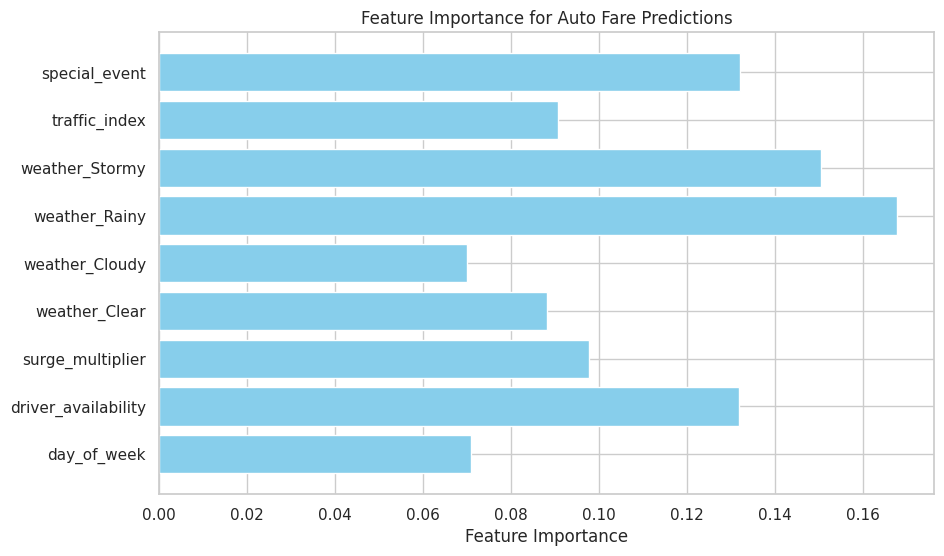

In [37]:
# XGBoost Model for Autos
from xgboost import XGBRegressor
# Prepare the data for XGBoost

autos_data = train[train['vehicle_type'] == 'auto']
autos_data['day_of_week'] = autos_data['timestamp'].dt.dayofweek
X_autos = autos_data[['day_of_week', 'driver_availability', 'surge_multiplier', 'weather_Clear', 'weather_Cloudy', 'weather_Rainy', 'weather_Stormy', 'traffic_index','special_event']]
y_autos = autos_data['average_fare']

# One-hot encode categorical variables
# Split into train and test
X_train_autos, X_test_autos, y_train_autos, y_test_autos = train_test_split(X_autos, y_autos, test_size=0.2, random_state=42)

# Train the XGBoost model for autos
model_autos = XGBRegressor(objective='reg:squarederror')
model_autos.fit(X_train_autos, y_train_autos)

# Generate predictions for the autos test set
auto_pred = model_autos.predict(X_test_autos)

# Evaluate the model for autos
autos_rmse = np.sqrt(mean_squared_error(y_test_autos, auto_pred))
print(f'Auto RMSE: {autos_rmse}')

# Plot feature importance
import matplotlib.pyplot as plt

importances = model_autos.feature_importances_
features = X_train_autos.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Auto Fare Predictions')
plt.show()

In [38]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX


# Function to prepare data for SARIMAX for a specific vehicle type
def prepare_data_for_sarimax(df):
    # Convert 'timestamp' column to datetime and remove duplicates
    #df['timestamp'] = pd.to_datetime(df['timestamp'])
    df = df.drop_duplicates(subset=['timestamp', 'vehicle_type'])
    
    # Filter for the specific vehicle type (e.g., 'bike' or 'car')
    #df = df[df['vehicle_type'] == vehicle_type]
    
    # Pivot and reindex to ensure a continuous time series
    df_pivot = df.pivot(index='timestamp', columns='vehicle_type', values='average_fare')
    all_dates = pd.date_range(start=df_pivot.index.min(), end=df_pivot.index.max(), freq='D')
    df_pivot = df_pivot.reindex(all_dates)
    
    return df_pivot

# Function to add features for SARIMAX model
# Function to add features for SARIMAX model
def add_features(df, original_df, vehicle_type):
    # Filter original_df for only the specified vehicle type
    original_df = original_df[original_df['vehicle_type'] == vehicle_type]
    
    # Add traffic_index and special_event
    df['traffic_index'] = original_df['traffic_index'].fillna(original_df['traffic_index'].median())
    df['special_event'] = original_df['special_event'].fillna(0)
    df['is_weekend'] = df.index.dayofweek > 4
    
    # Add peak hour feature
    df['is_peak_hour'] = df.index.hour.isin(range(7, 9)) | df.index.hour.isin(range(17, 19))

    # Create dummy variables for 'weather' if it exists
    if 'weather' in original_df.columns:
        weather_dummies = pd.get_dummies(original_df['weather'], drop_first=True)
        df = df.join(weather_dummies)
    
    # Ensure no NaNs or infinite values
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.fillna(0, inplace=True)
    
    return df

# Prepare data and features for 'bike'
bike_data = train[train['vehicle_type'] == 'bike']
bike_data = prepare_data_for_sarimax(bike_data)
bike_data_with_features = add_features(bike_data, train, 'bike')

# Fit SARIMAX model for 'bike'
endog_bike = bike_data_with_features['bike'].fillna(method='ffill').astype(float)
exog_bike = bike_data_with_features.drop(columns=['bike']).astype(float)

model_bike = SARIMAX(endog_bike, exog=exog_bike, order=(1,0,1), seasonal_order=(1,1,1,7)).fit(disp=False)

# Prepare data and features for 'car'
car_data = train[train['vehicle_type'] == 'car']
car_data = prepare_data_for_sarimax(car_data)
#car_data = train[train['vehicle_type'] == 'car']
car_data_with_features = add_features(car_data, train, 'car')

# Fit SARIMAX model for 'car'
endog_car = car_data_with_features['car'].fillna(method='ffill').astype(float)
exog_car = car_data_with_features.drop(columns=['car']).astype(float)

model_car = SARIMAX(endog_car, exog=exog_car, order=(2,0,1), seasonal_order=(1,1,1,7)).fit(disp=False)


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Rationale behind our choice of model for the corresponding vehicle type.

*SARIMAX FOR CAR AND BIKE:*

-> Based on the models and analysis from Task1 and Task3 we noticed that car and bike show trend and seasonality, and this model was giving the best results for the respective vehicle_types(car and bike).
-> As we know SARIMAX is best suited for Regular, consistent seasonal patterns, Clear trends (linear/quadratic)

*XGboost FOR AUTO:*

-> Amoung the multiple models we tried that included XGboost, Garch, VAR, prophet, lstm and GPR. XGboost gave us the best results for vehicle_type auto.
-> Another reason for us going with XGboost is that there are many benefits in using XGboost in terms of trend and seasonality:

1)Trend:

->it captures both linear and non-linear trends.

->Works for the following:

Upward/downward trends, Flat trends, Multiple trend changes, Sudden level shifts

2)Seasonality:

It can also handle multiple seasonlity patterns:

Multiple seasonal patterns simultaneously (e.g., daily, weekly, monthly), Irregular seasonality, Changing seasonal patterns, Interaction between different seasonal cycles

3)Flexible:

Better than traditional time series models:

Seasonality is not consistent, Patterns are complex or changing, Multiple factors influence the pattern, There are irregular spikes or dips

# How would you go about implementing an ensemble modelling approach using all 3 models?

1) Data Preparation
   Standardize time series data across all models
   sort the data according to timestamp ,grouped by vehicle type
   Create a unified validation framework using the same time periods

2) Base Model Layer
   Keeping individual models (2 SARIMAX, 1 XGBoost) as separate components
   each of the models will generate its predictions for its respective vehicle type
   we can maintain their original configurations as they're already optimized for specific patterns

4) Meta-Features Generation
   Create additional features for the ensemble layer like is_rush_hour,is_weekend,rides_per_driver etc
   use the individual model predictions
   we can use the previous metrics for each model under different conditions like special_event, weather_severity and demand_pressure
   we can use the demand and supply correlation metrics between vehicle types

4) Ensemble Architecture
   Weighting Approach:
   Level 1: Base models generate predictions
   Level 2: Meta-model combines predictions using features above
   we will give highest weightage to the base models (level 1) since they've been optimised for the task
   and give slightly lesser weightage to the level 2 features
   and the combined score would be used for prediction
   
5) Validation Strategy
   Use time-based cross-validation
   implement separate validation for:
       Individual model performance
       Ensemble performance
   and based on the validation scores we can update the weights of our ensemble model

This approach combines the strengths of each base model while adding a sophisticated layer that can:
Learn from the patterns of all vehicle types
Adapt to changing conditions
Provide more robust predictions
Handle complex interactions between different vehicle demands and supplys 

## Example submission, just for your reference

In [39]:
test.head()

,timestamp,rides_completed,driver_availability,surge_multiplier,vehicle_type,traffic_index,special_event,weather_Clear,weather_Cloudy,weather_Rainy,weather_Stormy
0,2023-05-26 05:00:00,10,30.000000,1.3,car,99,0,0,1,0,0
1,2023-05-26 05:00:00,274,71.945314,1.0,bike,26,0,1,0,0,0
2,2023-05-26 05:00:00,341,38.421681,1.2,auto,62,0,0,0,1,0
3,2023-05-26 06:00:00,81,31.053947,1.0,car,77,0,0,1,0,0
4,2023-05-26 06:00:00,268,52.334213,1.2,bike,32,0,0,0,1,0


In [40]:
test_auto=test[test['vehicle_type']=='auto']
test_bike=test[test['vehicle_type']=='bike']
test_car=test[test['vehicle_type']=='car']

In [41]:
test_auto['day_of_week'] = test_auto['timestamp'].dt.dayofweek
X_test_autos = test_auto[['day_of_week', 'driver_availability', 'surge_multiplier', 'weather_Clear', 'weather_Cloudy', 'weather_Rainy', 'weather_Stormy', 'traffic_index','special_event']]
pred_auto = model_autos.predict(X_test_autos)

In [42]:
def prepare_test_data(df):
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df.set_index('timestamp', inplace=True)
    return df

In [43]:
# 1. For bikes using SARIMAX model
test_bike_data = prepare_test_data(test_bike)
test_bike_data_with_features = add_features(test_bike_data, test, 'bike')
exog_test_bike = test_bike_data_with_features.drop(columns=['vehicle_type'], errors='ignore')
exog_test_bike = pd.get_dummies(exog_test_bike, drop_first=True).astype(float)
exog_test_bike = exog_test_bike.reindex(columns=model_bike.model.exog_names, fill_value=0)  # Ensure correct shape

forecast_test_bike = model_bike.get_forecast(steps=len(exog_test_bike), exog=exog_test_bike)
forecast_test_bike_mean = forecast_test_bike.predicted_mean
pred_bike=forecast_test_bike_mean.values

In [44]:
# 2. For cars using SARIMAX model
test_car_data = prepare_test_data(test_car)
test_car_data_with_features = add_features(test_car_data, test, 'car')
exog_test_car = test_car_data_with_features.drop(columns=['vehicle_type'], errors='ignore')
exog_test_car = pd.get_dummies(exog_test_car, drop_first=True).astype(float)
exog_test_car = exog_test_car.reindex(columns=model_car.model.exog_names, fill_value=0)  # Ensure correct shape

forecast_test_car = model_car.get_forecast(steps=len(exog_test_car), exog=exog_test_car)
forecast_test_car_mean = forecast_test_car.predicted_mean
pred_car=forecast_test_car_mean.values

In [45]:
submission = pd.DataFrame()
sample_submission = pd.read_csv('/kaggle/input/data-analytics-ue-22-cs-342-aa-2-hackathon-2/sample_submission.csv')


## We have used a sample-submission just to show you the format your submission should be in, you have to use your OWN forecasts while making submissions


In [46]:
submission['timestamp'] = sample_submission['timestamp']
submission['average_fare_bike'] = pred_bike
submission['average_fare_auto'] = pred_auto
submission['average_fare_car'] = pred_car

In [47]:
submission.describe()

,average_fare_bike,average_fare_auto,average_fare_car
count,5252.000000,5252.000000,5252.000000
mean,82.098551,41.315987,152.760510
std,1.383908,0.936603,1.516736
min,79.922347,39.183140,149.907227
25%,80.558289,40.724176,151.434429
50%,82.112893,41.092783,152.786397
75%,83.570719,41.661717,154.065251
max,84.195340,48.993649,155.708989


In [48]:
submission.head(15)

,timestamp,average_fare_bike,average_fare_auto,average_fare_car
0,2023-05-26 05:00:00,83.233229,41.578960,155.176743
1,2023-05-26 06:00:00,83.542725,41.723778,155.708989
2,2023-05-26 07:00:00,82.503415,39.974823,154.648468
3,2023-05-26 08:00:00,80.951451,40.762127,152.762691
4,2023-05-26 09:00:00,79.922347,46.049854,151.779338
5,2023-05-26 10:00:00,80.085505,42.304695,152.121174
6,2023-05-26 11:00:00,81.889805,41.254467,153.746924
7,2023-05-26 12:00:00,83.436219,42.006866,155.174711
8,2023-05-26 13:00:00,83.724986,41.615925,155.689870
9,2023-05-26 14:00:00,82.639275,42.334412,154.626068


In [49]:
submission.to_csv('submission.csv', index = False)

## Congratulations! 🎉

You've done it! You've successfully completed the Data Analytics (UE22CS342AA2) Hackathon-2, and that's something to be truly proud of! This achievement shows just how much you've grown in your ability to tackle time-series modeling and analysis.

### Here’s what you’ve accomplished:
- You applied data analytics concepts to solve real-world problems.
- You developed time-series models, a skill that’s essential in fields like finance (think stock predictions) and healthcare (monitoring vitals)—and many more!

### What's next:
With this experience, you’ve laid a solid foundation for real-world data modeling and time-series analysis. The techniques you’ve mastered here will be incredibly valuable in many data science and machine learning projects, no matter the industry.

But remember, this is just the start of your journey in data science! Keep learning, keep pushing yourself, and most importantly, keep having fun with it. You're ready for even more exciting and challenging projects.

**Huge congrats once again, and wishing you all the best for your ISAs and ESAs! You've got this! 🌟** 